In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from IPython.display import display
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
# pd.set_option('future.no_silent_downcasting', False)


In [2]:
# open and read excel file
x_vars = pd.read_excel("C:/Users/Acer/Desktop/Madi/Tasks/Nowcasting/Data/input data/Темпа-Осадки-Поголовье_new.xlsx")
x_vars.head(5)

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,3.9,4.9,5.9,6.9,7.9,8.9,9.9,10.9,11.9,12.9
0,Температура,Акмолинская область,-12.490323,-10.192857,-5.870968,4.490000,14.574194,20.763333,19.180645,16.529032,...,-4.809677,8.026667,10.696774,21.043333,20.270968,17.338710,11.300000,3.832258,-4.343333,-7.638710
1,Температура,Актюбинская область,-13.483871,-11.821429,-5.990323,6.356667,15.609677,25.126667,23.167742,20.732258,...,-4.800000,13.513333,13.083871,22.893333,22.912903,20.206452,14.083333,6.667742,-1.520000,-6.419355
2,Температура,Алматинская область,-5.432258,-1.100000,2.909677,12.126667,17.180645,20.980000,25.564516,22.100000,...,2.812903,11.100000,16.348387,22.023333,23.158065,23.487097,13.726667,9.222581,2.256667,-6.796774
3,Температура,Атырауская область,-6.222581,-6.300000,0.380645,10.856667,19.506452,28.906667,27.177419,25.241935,...,2.522581,17.776667,17.341935,27.453333,28.264516,25.774194,19.956667,10.648387,3.096667,-2.612903
4,Температура,Западно-Казахстанская область,-11.845161,-8.928571,-4.406452,7.470000,17.100000,25.283333,22.690323,20.348387,...,-4.632258,14.926667,13.332258,23.853333,24.132258,21.151613,15.246667,8.261290,0.423333,-5.496774


In [3]:
x_vars = x_vars.rename(columns={x_vars.columns[0]: "Показатель", x_vars.columns[1]: "Регион"})
x_vars.head(5)

,Показатель,Регион,1,2,3,4,5,6,7,8,...,3.9,4.9,5.9,6.9,7.9,8.9,9.9,10.9,11.9,12.9
0,Температура,Акмолинская область,-12.490323,-10.192857,-5.870968,4.490000,14.574194,20.763333,19.180645,16.529032,...,-4.809677,8.026667,10.696774,21.043333,20.270968,17.338710,11.300000,3.832258,-4.343333,-7.638710
1,Температура,Актюбинская область,-13.483871,-11.821429,-5.990323,6.356667,15.609677,25.126667,23.167742,20.732258,...,-4.800000,13.513333,13.083871,22.893333,22.912903,20.206452,14.083333,6.667742,-1.520000,-6.419355
2,Температура,Алматинская область,-5.432258,-1.100000,2.909677,12.126667,17.180645,20.980000,25.564516,22.100000,...,2.812903,11.100000,16.348387,22.023333,23.158065,23.487097,13.726667,9.222581,2.256667,-6.796774
3,Температура,Атырауская область,-6.222581,-6.300000,0.380645,10.856667,19.506452,28.906667,27.177419,25.241935,...,2.522581,17.776667,17.341935,27.453333,28.264516,25.774194,19.956667,10.648387,3.096667,-2.612903
4,Температура,Западно-Казахстанская область,-11.845161,-8.928571,-4.406452,7.470000,17.100000,25.283333,22.690323,20.348387,...,-4.632258,14.926667,13.332258,23.853333,24.132258,21.151613,15.246667,8.261290,0.423333,-5.496774


In [4]:
# Flatten to "YYYY-MM" strings

# Generate full list of months
years = list(range(2015, 2025))  # 2015 to 2024
months = list(range(1, 13))      # 1 to 12

periods = [f"{year}-{str(month).zfill(2)}" for year in years for month in months]
periods

['2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '20

In [5]:
# Suppose the first two columns are: "Регион" and "Категория"
x_vars.columns = list(x_vars.columns[:2]) + periods
x_vars

,Показатель,Регион,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,Температура,Акмолинская область,-12.490323,-10.192857,-5.870968,4.490000,14.574194,20.763333,19.180645,16.529032,...,-4.809677,8.026667,10.696774,21.043333,20.270968,17.338710,11.300000,3.832258,-4.343333,-7.638710
1,Температура,Актюбинская область,-13.483871,-11.821429,-5.990323,6.356667,15.609677,25.126667,23.167742,20.732258,...,-4.800000,13.513333,13.083871,22.893333,22.912903,20.206452,14.083333,6.667742,-1.520000,-6.419355
2,Температура,Алматинская область,-5.432258,-1.100000,2.909677,12.126667,17.180645,20.980000,25.564516,22.100000,...,2.812903,11.100000,16.348387,22.023333,23.158065,23.487097,13.726667,9.222581,2.256667,-6.796774
3,Температура,Атырауская область,-6.222581,-6.300000,0.380645,10.856667,19.506452,28.906667,27.177419,25.241935,...,2.522581,17.776667,17.341935,27.453333,28.264516,25.774194,19.956667,10.648387,3.096667,-2.612903
4,Температура,Западно-Казахстанская область,-11.845161,-8.928571,-4.406452,7.470000,17.100000,25.283333,22.690323,20.348387,...,-4.632258,14.926667,13.332258,23.853333,24.132258,21.151613,15.246667,8.261290,0.423333,-5.496774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Поголовье: верблюды,Область Жетысу,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1819.000000,1834.000000,1841.000000,1861.000000,747.000000,685.000000,685.000000,685.000000,685.000000,685.000000
168,Поголовье: верблюды,Область Улытау,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,710.000000,711.000000,711.000000,747.000000,502.000000,510.000000,515.000000,515.000000,513.000000,509.000000
169,Поголовье: верблюды,Область Абай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,476.000000,444.000000,465.000000,495.000000,NaN,NaN,NaN,NaN,NaN,NaN
170,Поголовье: верблюды,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,20408.000000,21618.000000,23462.000000,24485.000000,24982.000000,25244.000000,24192.000000,23703.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# remove ЮКО
x_vars = x_vars[x_vars["Регион"] != "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ"]

# check region names
x_vars['Регион'].unique()

array(['Акмолинская область', 'Актюбинская область',
       'Алматинская область', 'Атырауская область',
       'Западно-Казахстанская область', 'Жамбылская область',
       'Карагандинская область', 'Костанайская область',
       'Кызылординская область', 'Мангистауская область',
       'Павлодарская область', 'Северо-Казахстанская область',
       'Восточно-Казахстанская область', 'г.Астана', 'г.Aлматы',
       'г.Шымкент', 'Туркестанская область', 'Область Жетысу',
       'Область Улытау', 'Область Абай', 'РЕСПУБЛИКА КАЗАХСТАН'],
      dtype=object)

In [7]:
region_mapping = {
    "Акмолинская область": "АКМОЛИНСКАЯ ОБЛАСТЬ",
    "Актюбинская область": "АКТЮБИНСКАЯ ОБЛАСТЬ",
    "Алматинская область": "АЛМАТИНСКАЯ ОБЛАСТЬ",
    "Атырауская область": "АТЫРАУСКАЯ ОБЛАСТЬ",
    "Западно-Казахстанская область": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "Жамбылская область": "ЖАМБЫЛСКАЯ ОБЛАСТЬ",
    "Карагандинская область": "КАРАГАНДИНСКАЯ ОБЛАСТЬ",
    "Костанайская область": "КОСТАНАЙСКАЯ ОБЛАСТЬ",
    "Кызылординская область": "КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ",
    "Мангистауская область": "МАНГИСТАУСКАЯ ОБЛАСТЬ",
    "Павлодарская область": "ПАВЛОДАРСКАЯ ОБЛАСТЬ",
    "Северо-Казахстанская область": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "Восточно-Казахстанская область": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "г.Астана": "ГОРОД АСТАНА",
    "г.Aлматы": "ГОРОД АЛМАТЫ",
    "г.Шымкент": "ГОРОД ШЫМКЕНТ",
    "Туркестанская область": "ТУРКЕСТАНСКАЯ ОБЛАСТЬ",
    "Область Жетысу": "ОБЛАСТЬ ЖЕТІСУ",
    "Область Улытау": "ОБЛАСТЬ ҰЛЫТАУ",
    "Область Абай": "ОБЛАСТЬ АБАЙ"           # already fine
}

x_vars["Регион"] = x_vars["Регион"].replace(region_mapping)
x_vars['Регион'].unique()

C:\Users\Acer\AppData\Local\Temp\ipykernel_9600\9204932.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_vars["Регион"] = x_vars["Регион"].replace(region_mapping)


array(['АКМОЛИНСКАЯ ОБЛАСТЬ', 'АКТЮБИНСКАЯ ОБЛАСТЬ',
       'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'КАРАГАНДИНСКАЯ ОБЛАСТЬ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'ПАВЛОДАРСКАЯ ОБЛАСТЬ', 'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ГОРОД АСТАНА', 'ГОРОД АЛМАТЫ',
       'ГОРОД ШЫМКЕНТ', 'ТУРКЕСТАНСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ ЖЕТІСУ',
       'ОБЛАСТЬ ҰЛЫТАУ', 'ОБЛАСТЬ АБАЙ', 'РЕСПУБЛИКА КАЗАХСТАН'],
      dtype=object)

In [8]:
x_vars['Показатель'].unique()

array(['Температура', 'Осадки', 'Поголовье: КРС', 'Поголовье: лошади',
       'Поголовье: овцы и козы', 'Поголовье: свиньи',
       'Поголовье: птица домашняя', 'Поголовье: верблюды'], dtype=object)

#### Data preparation

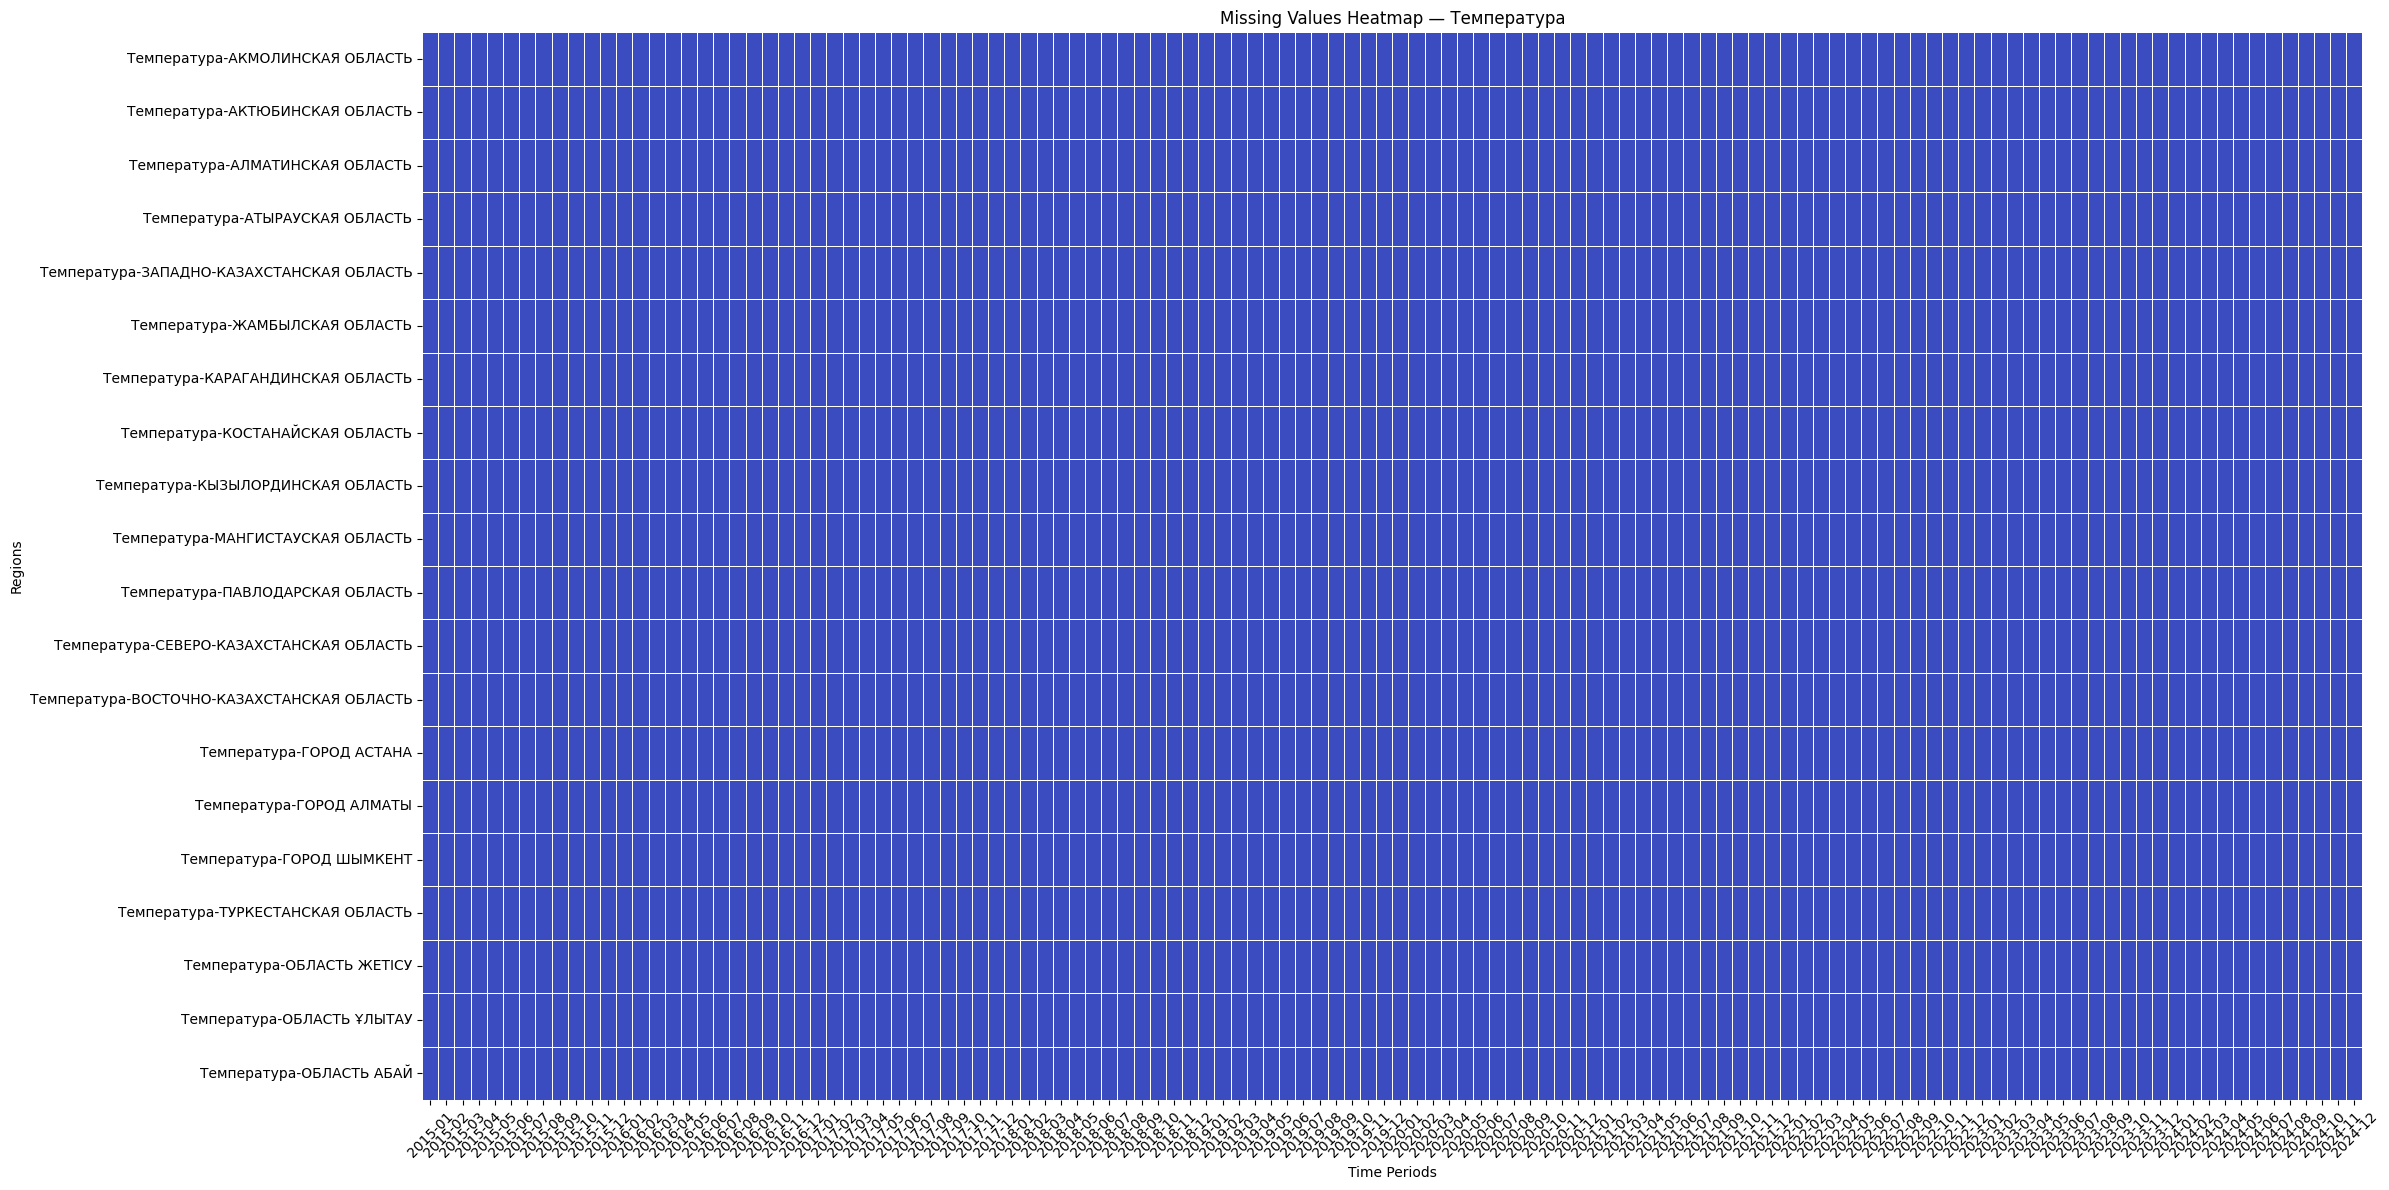

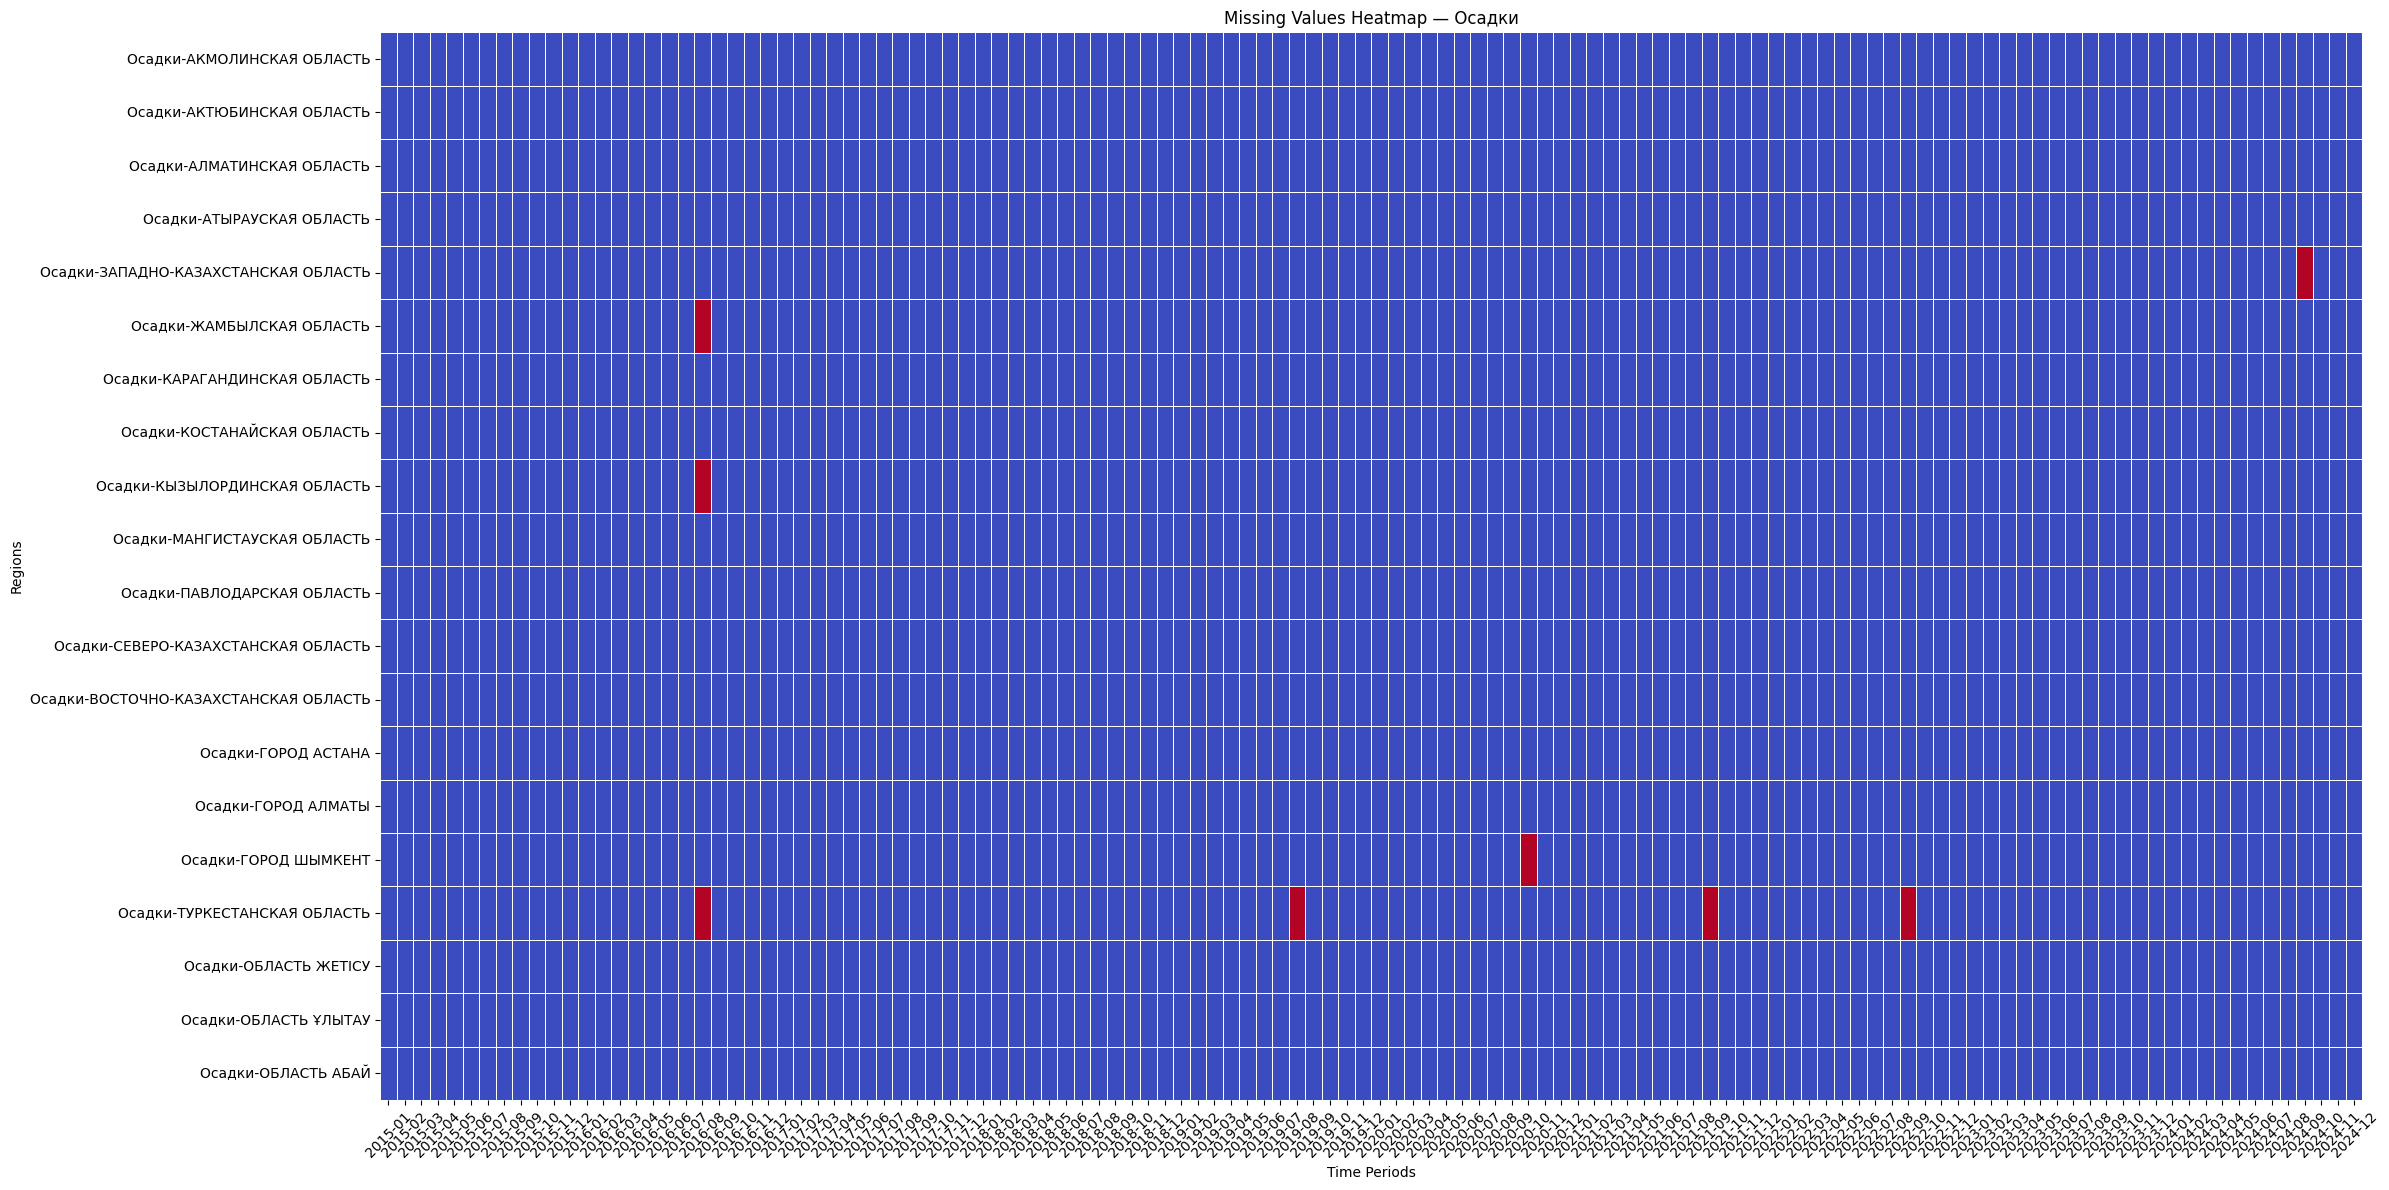

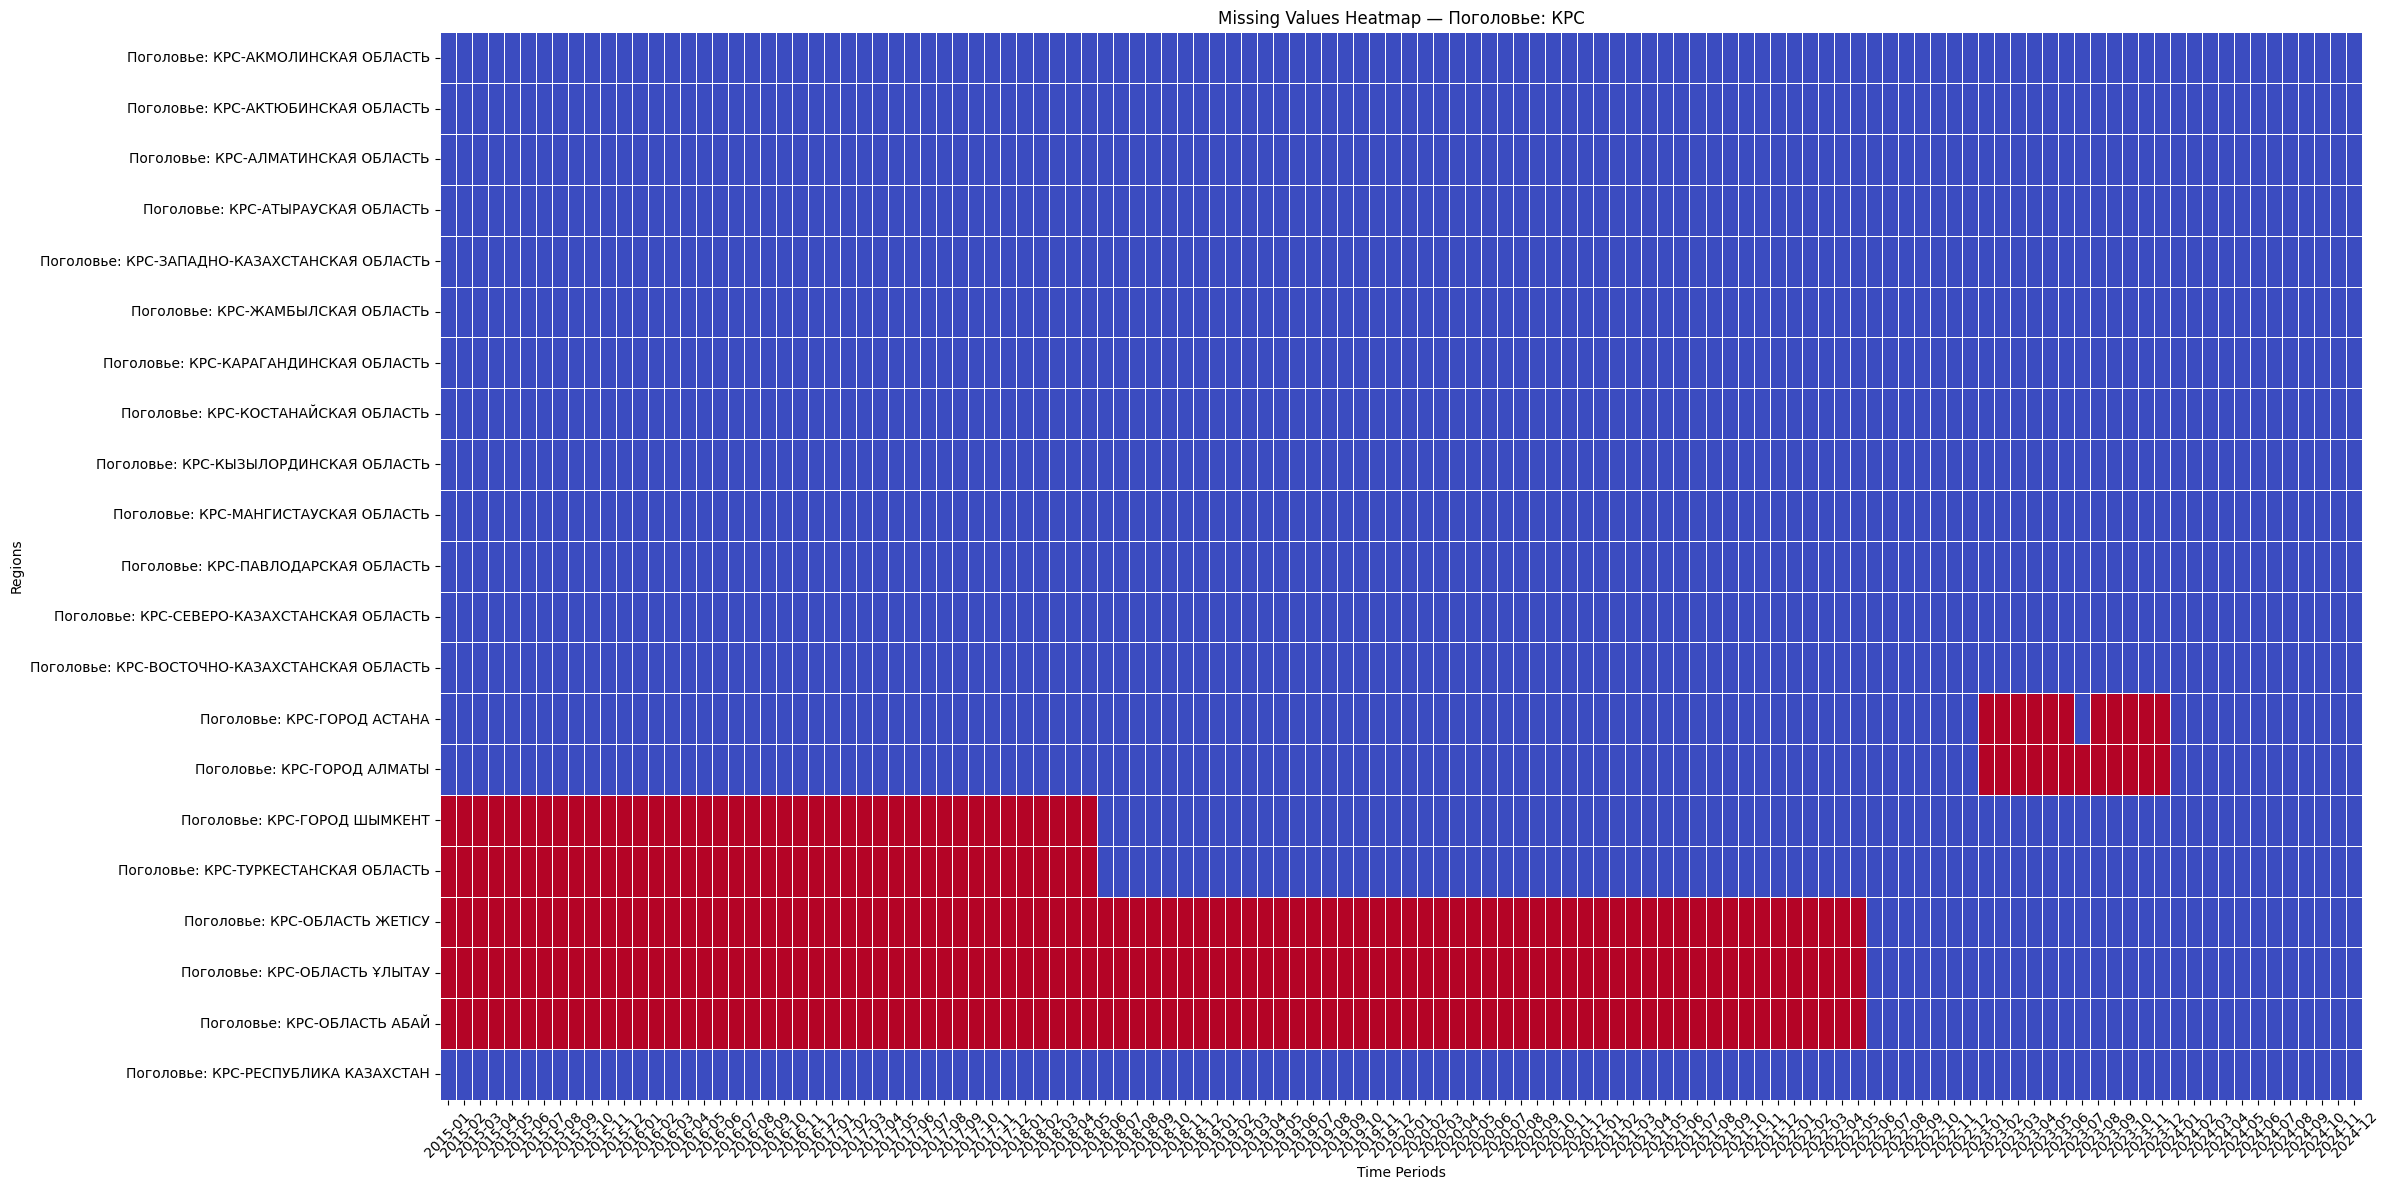

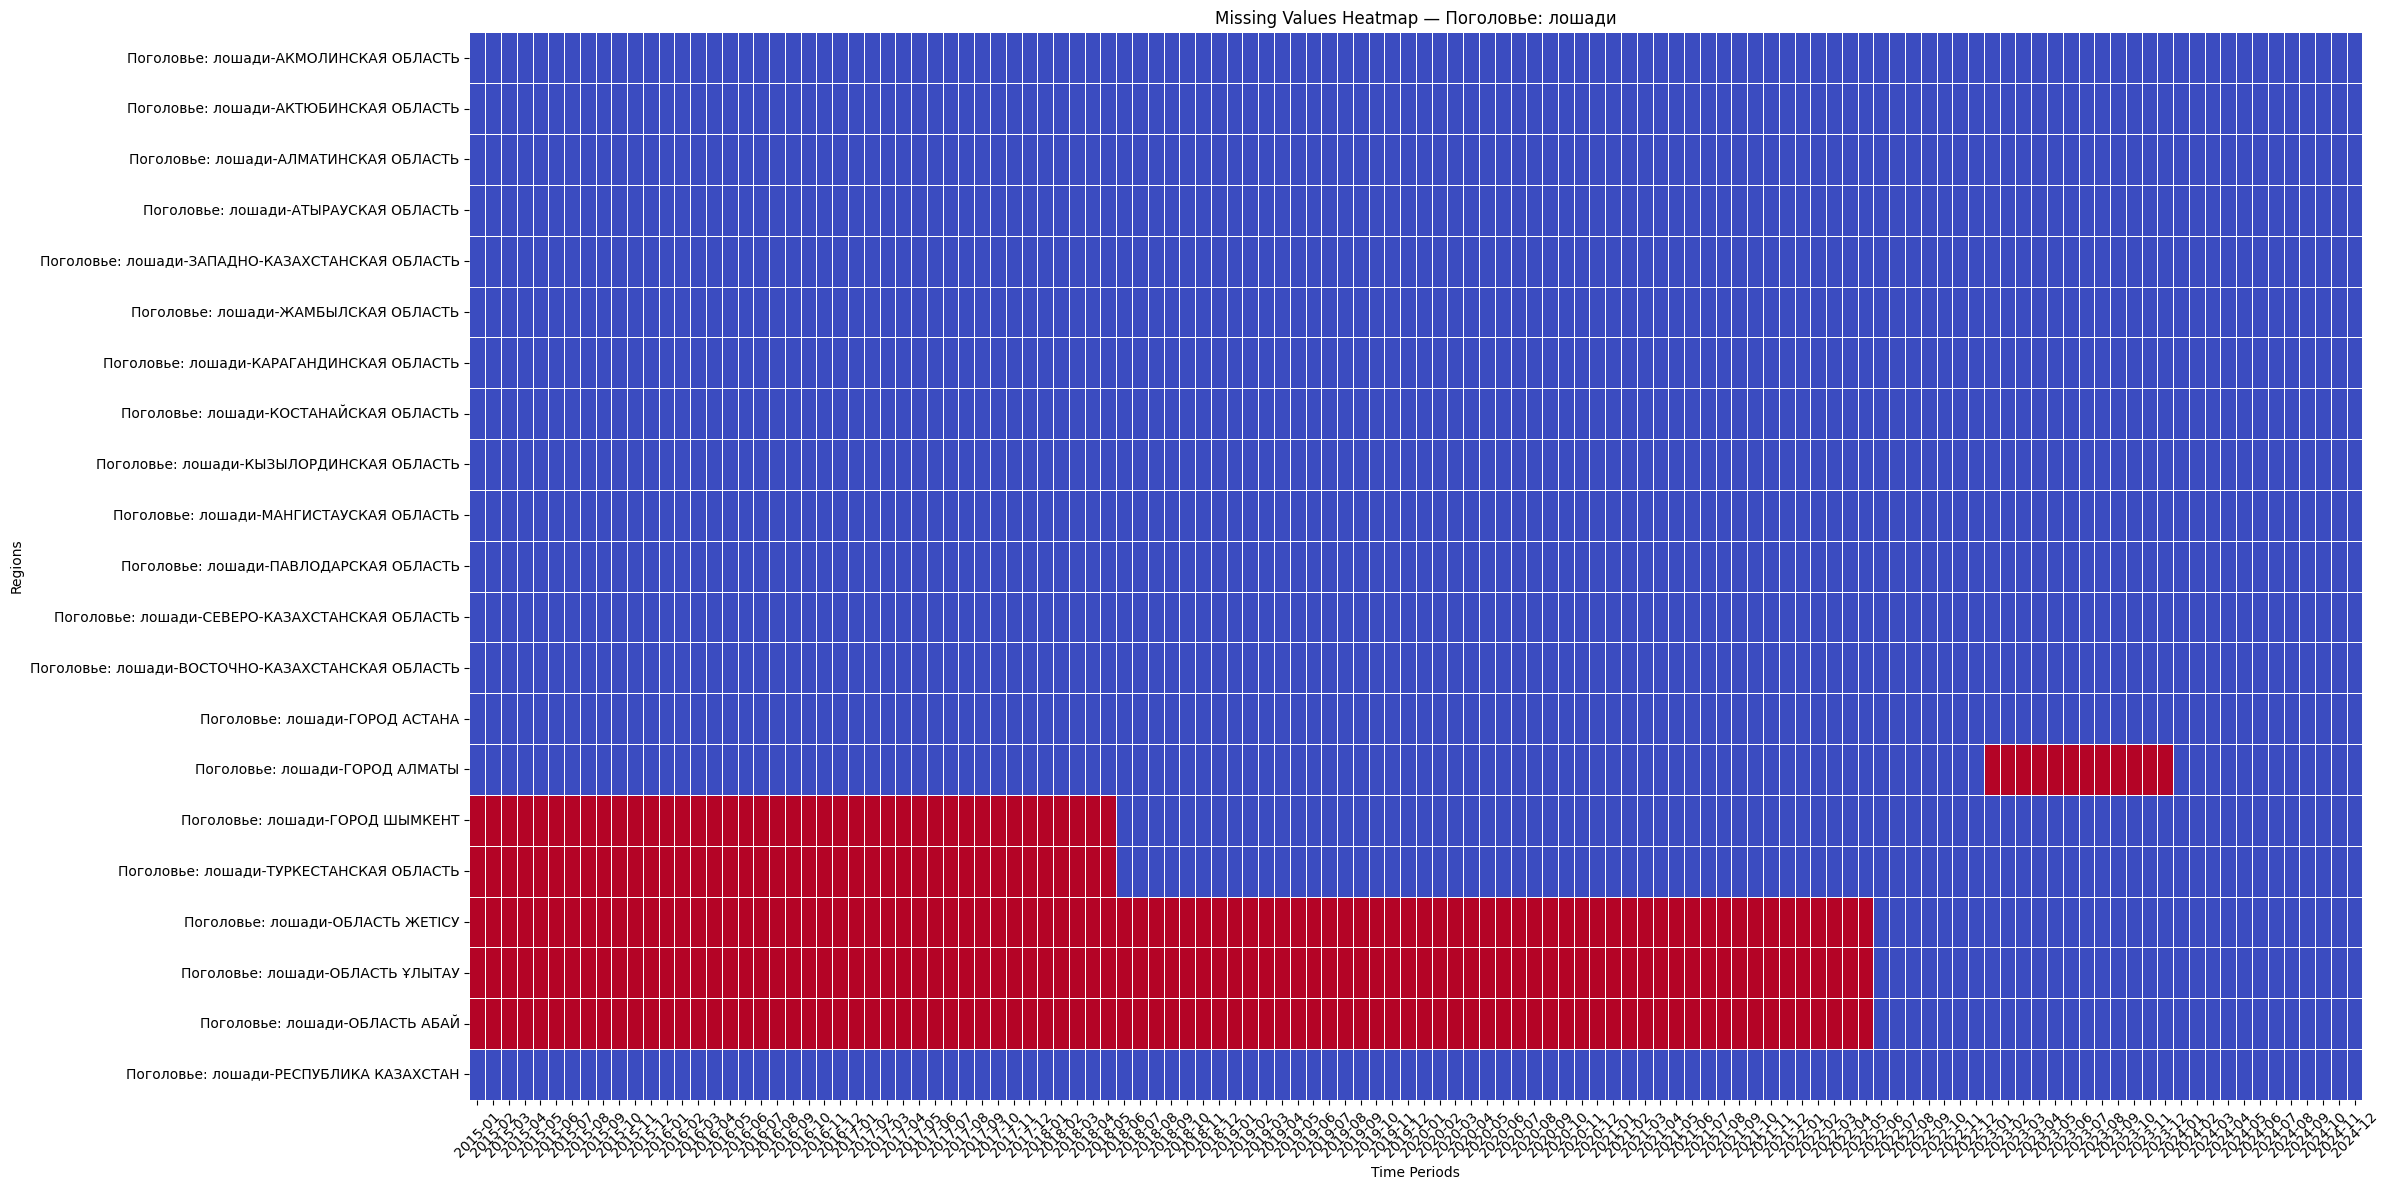

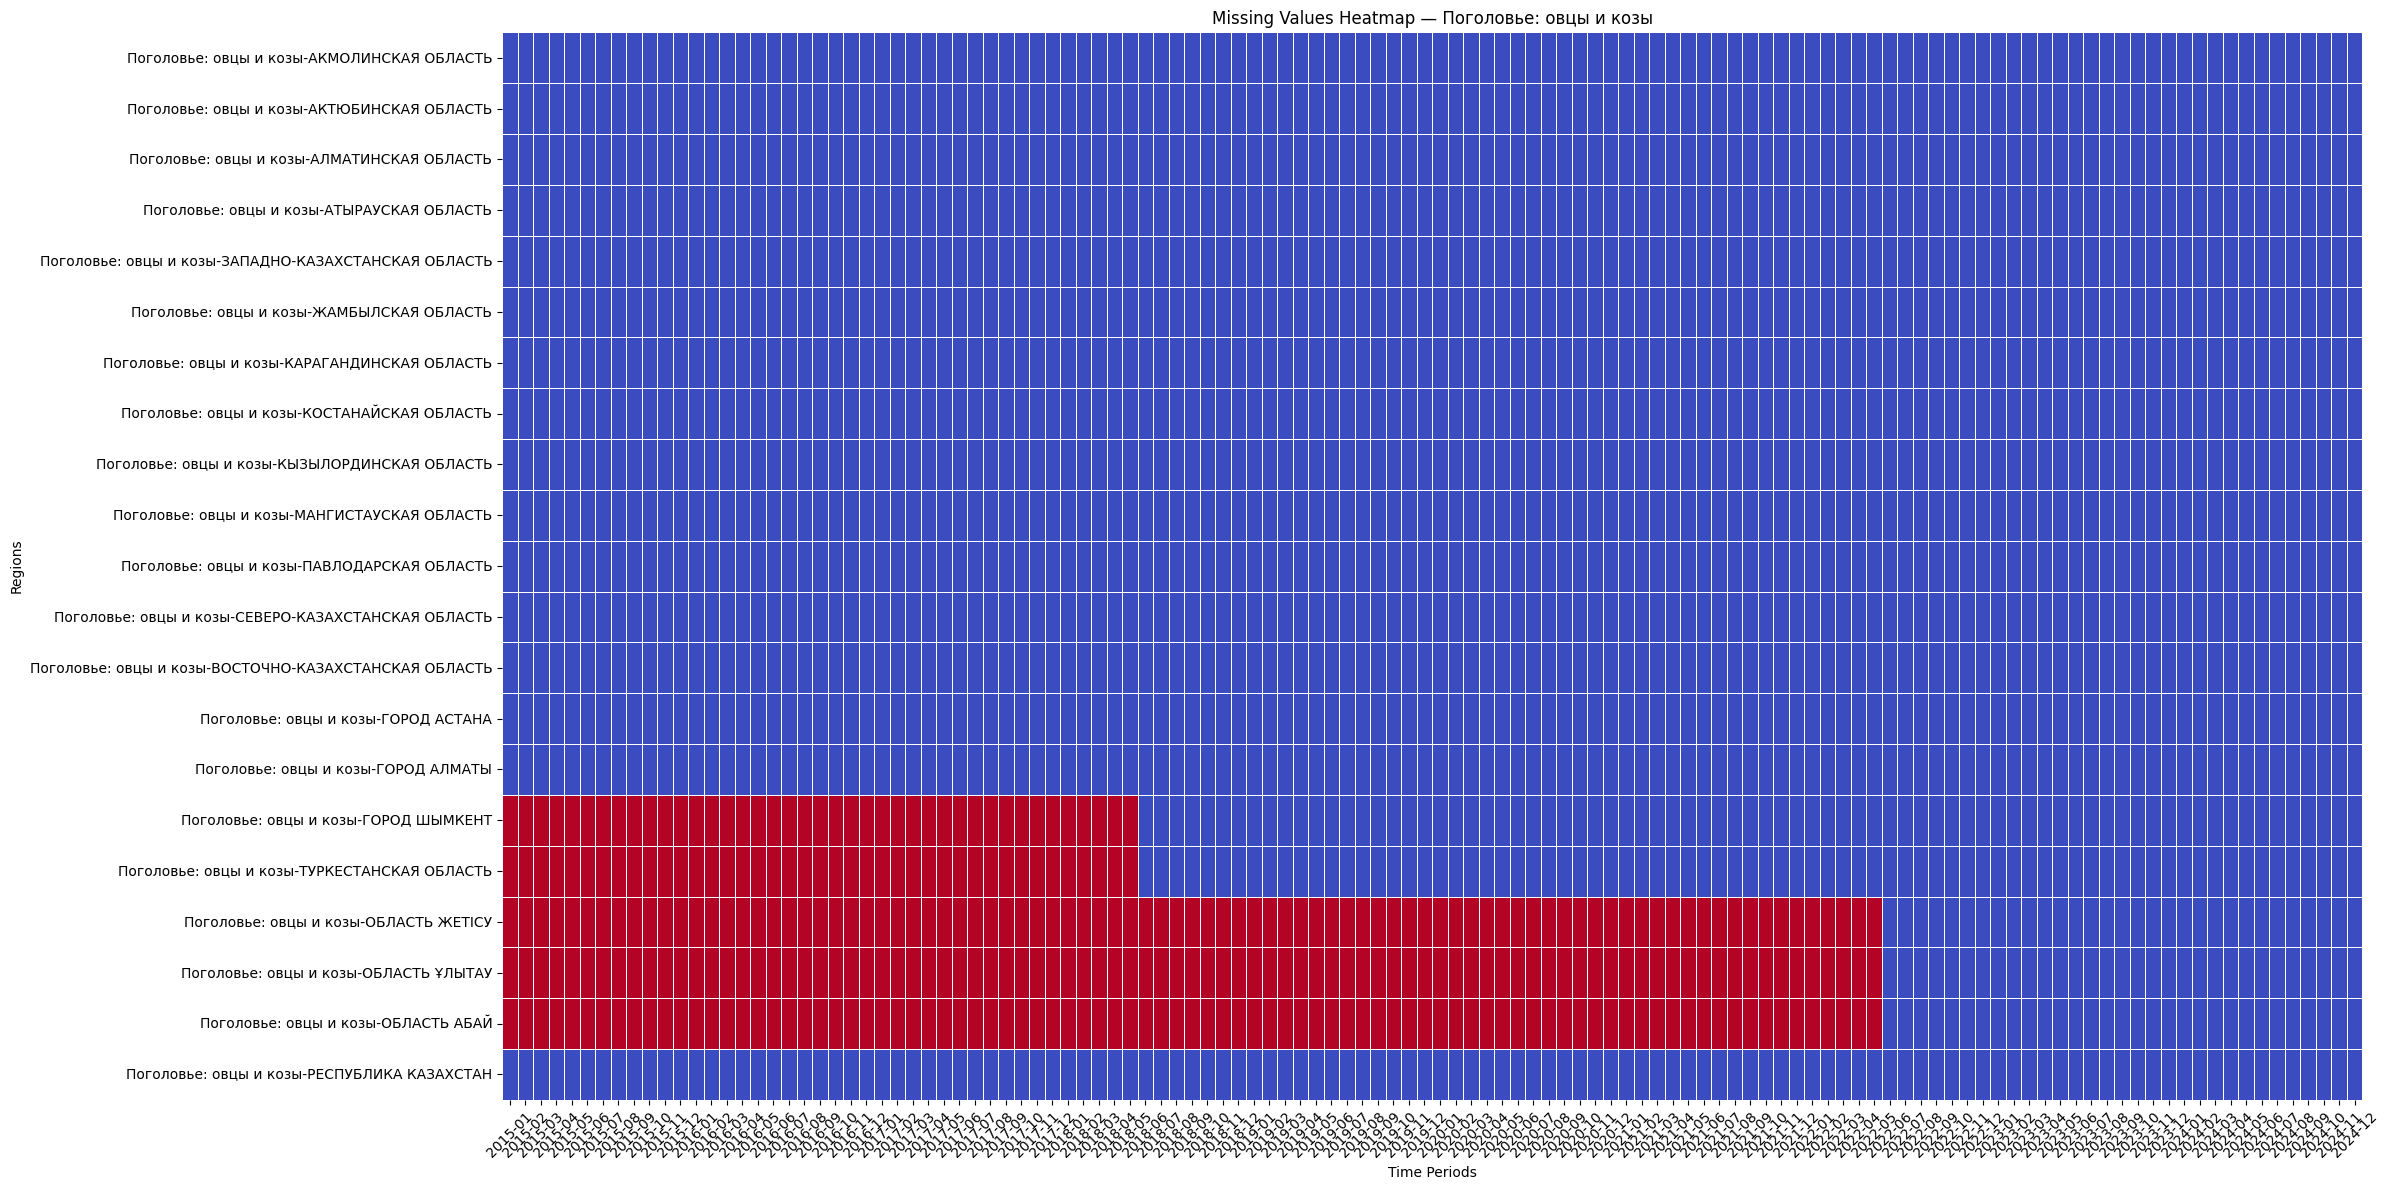

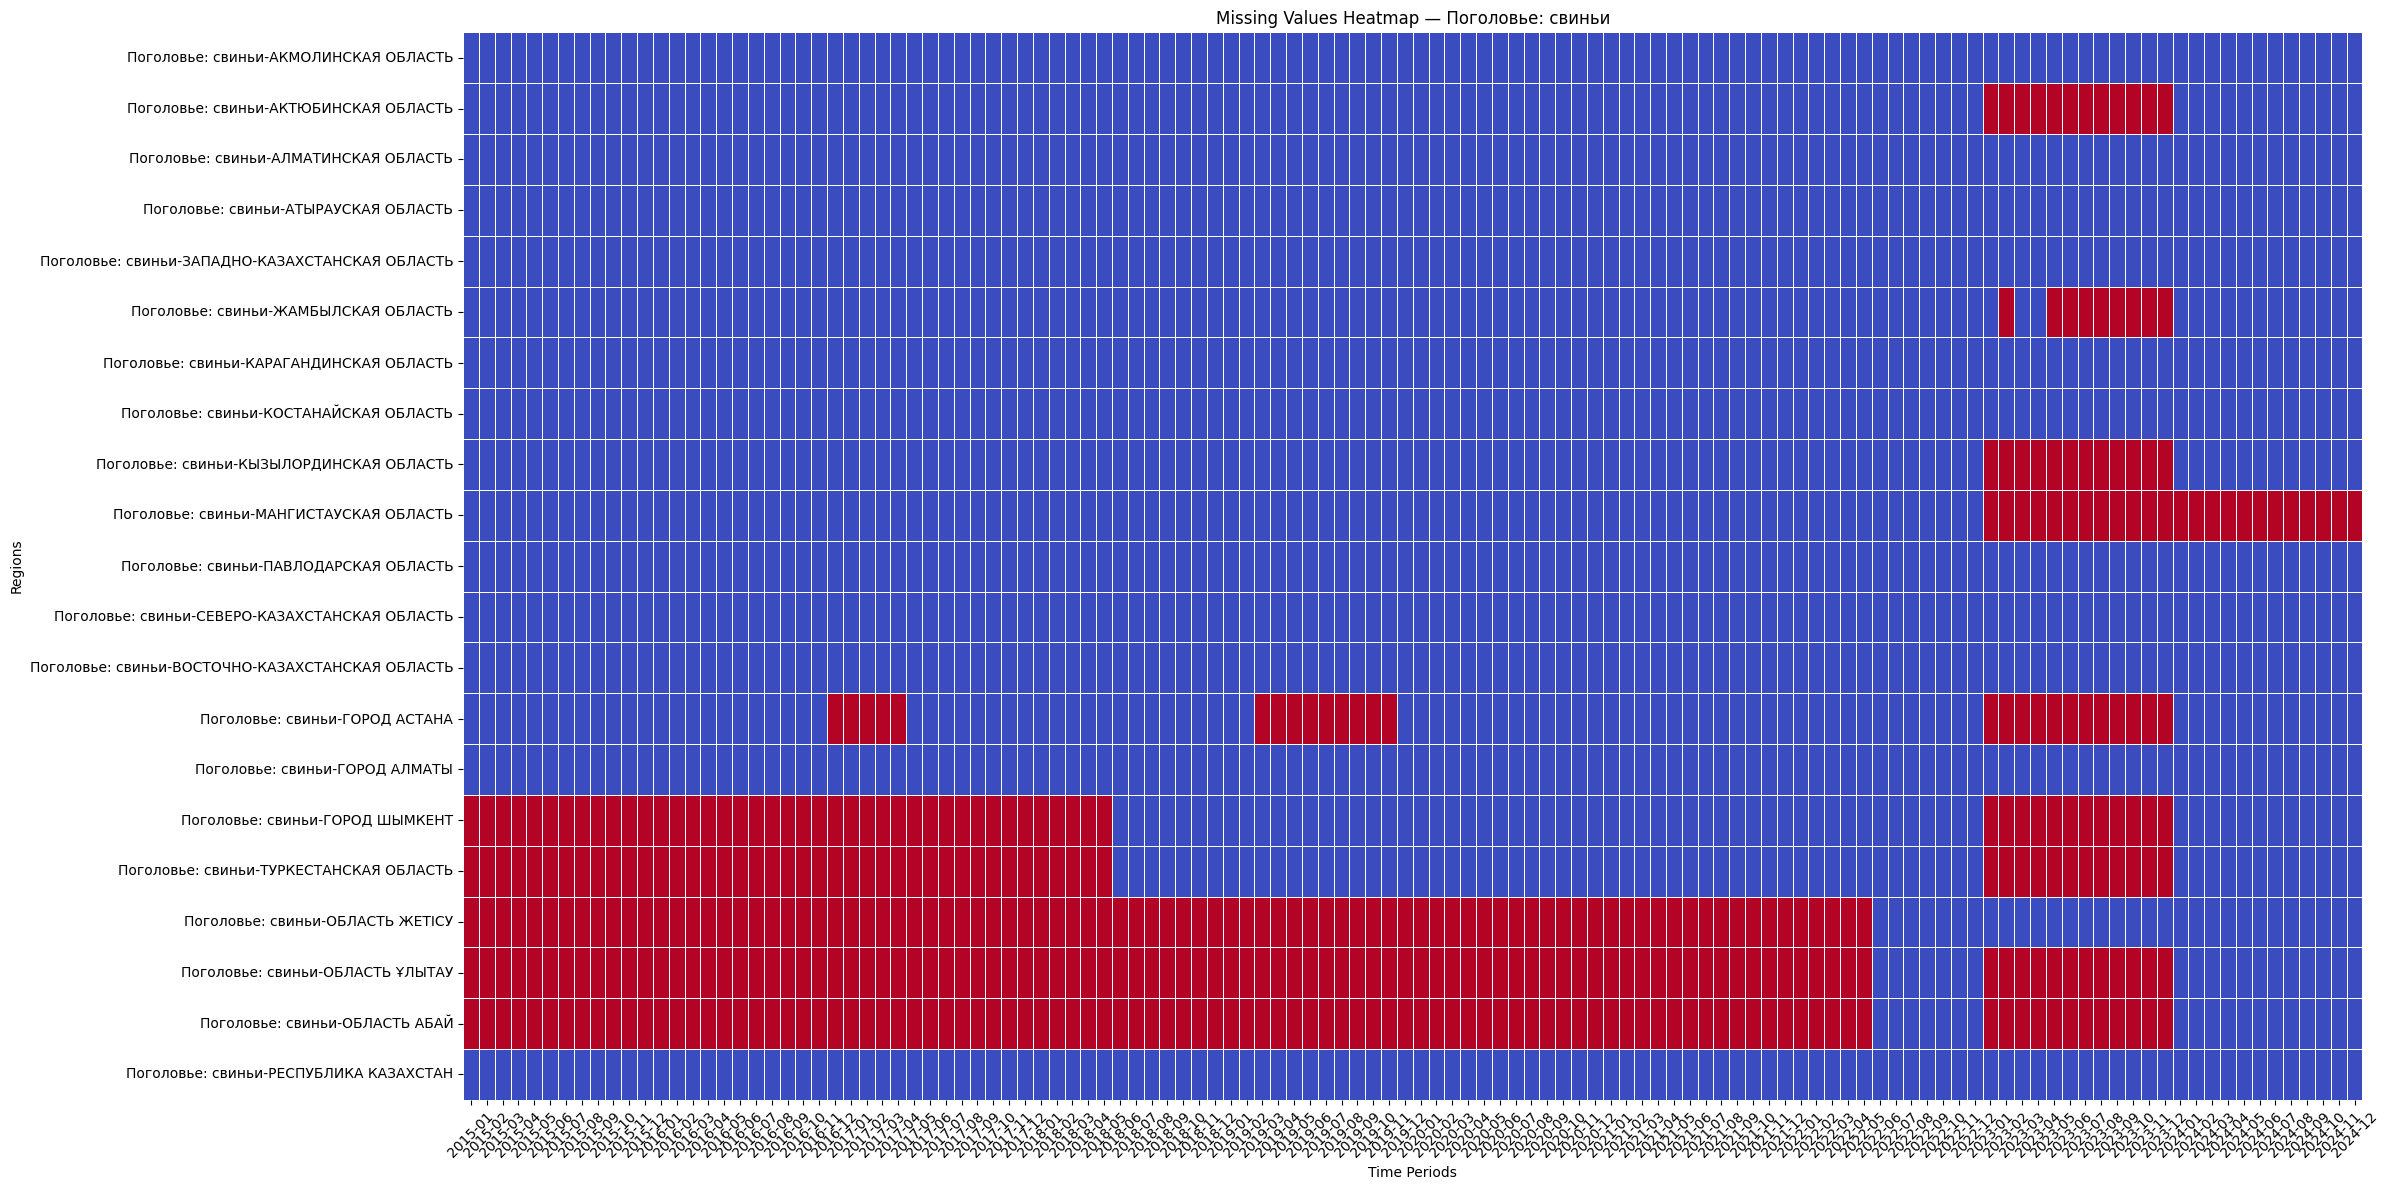

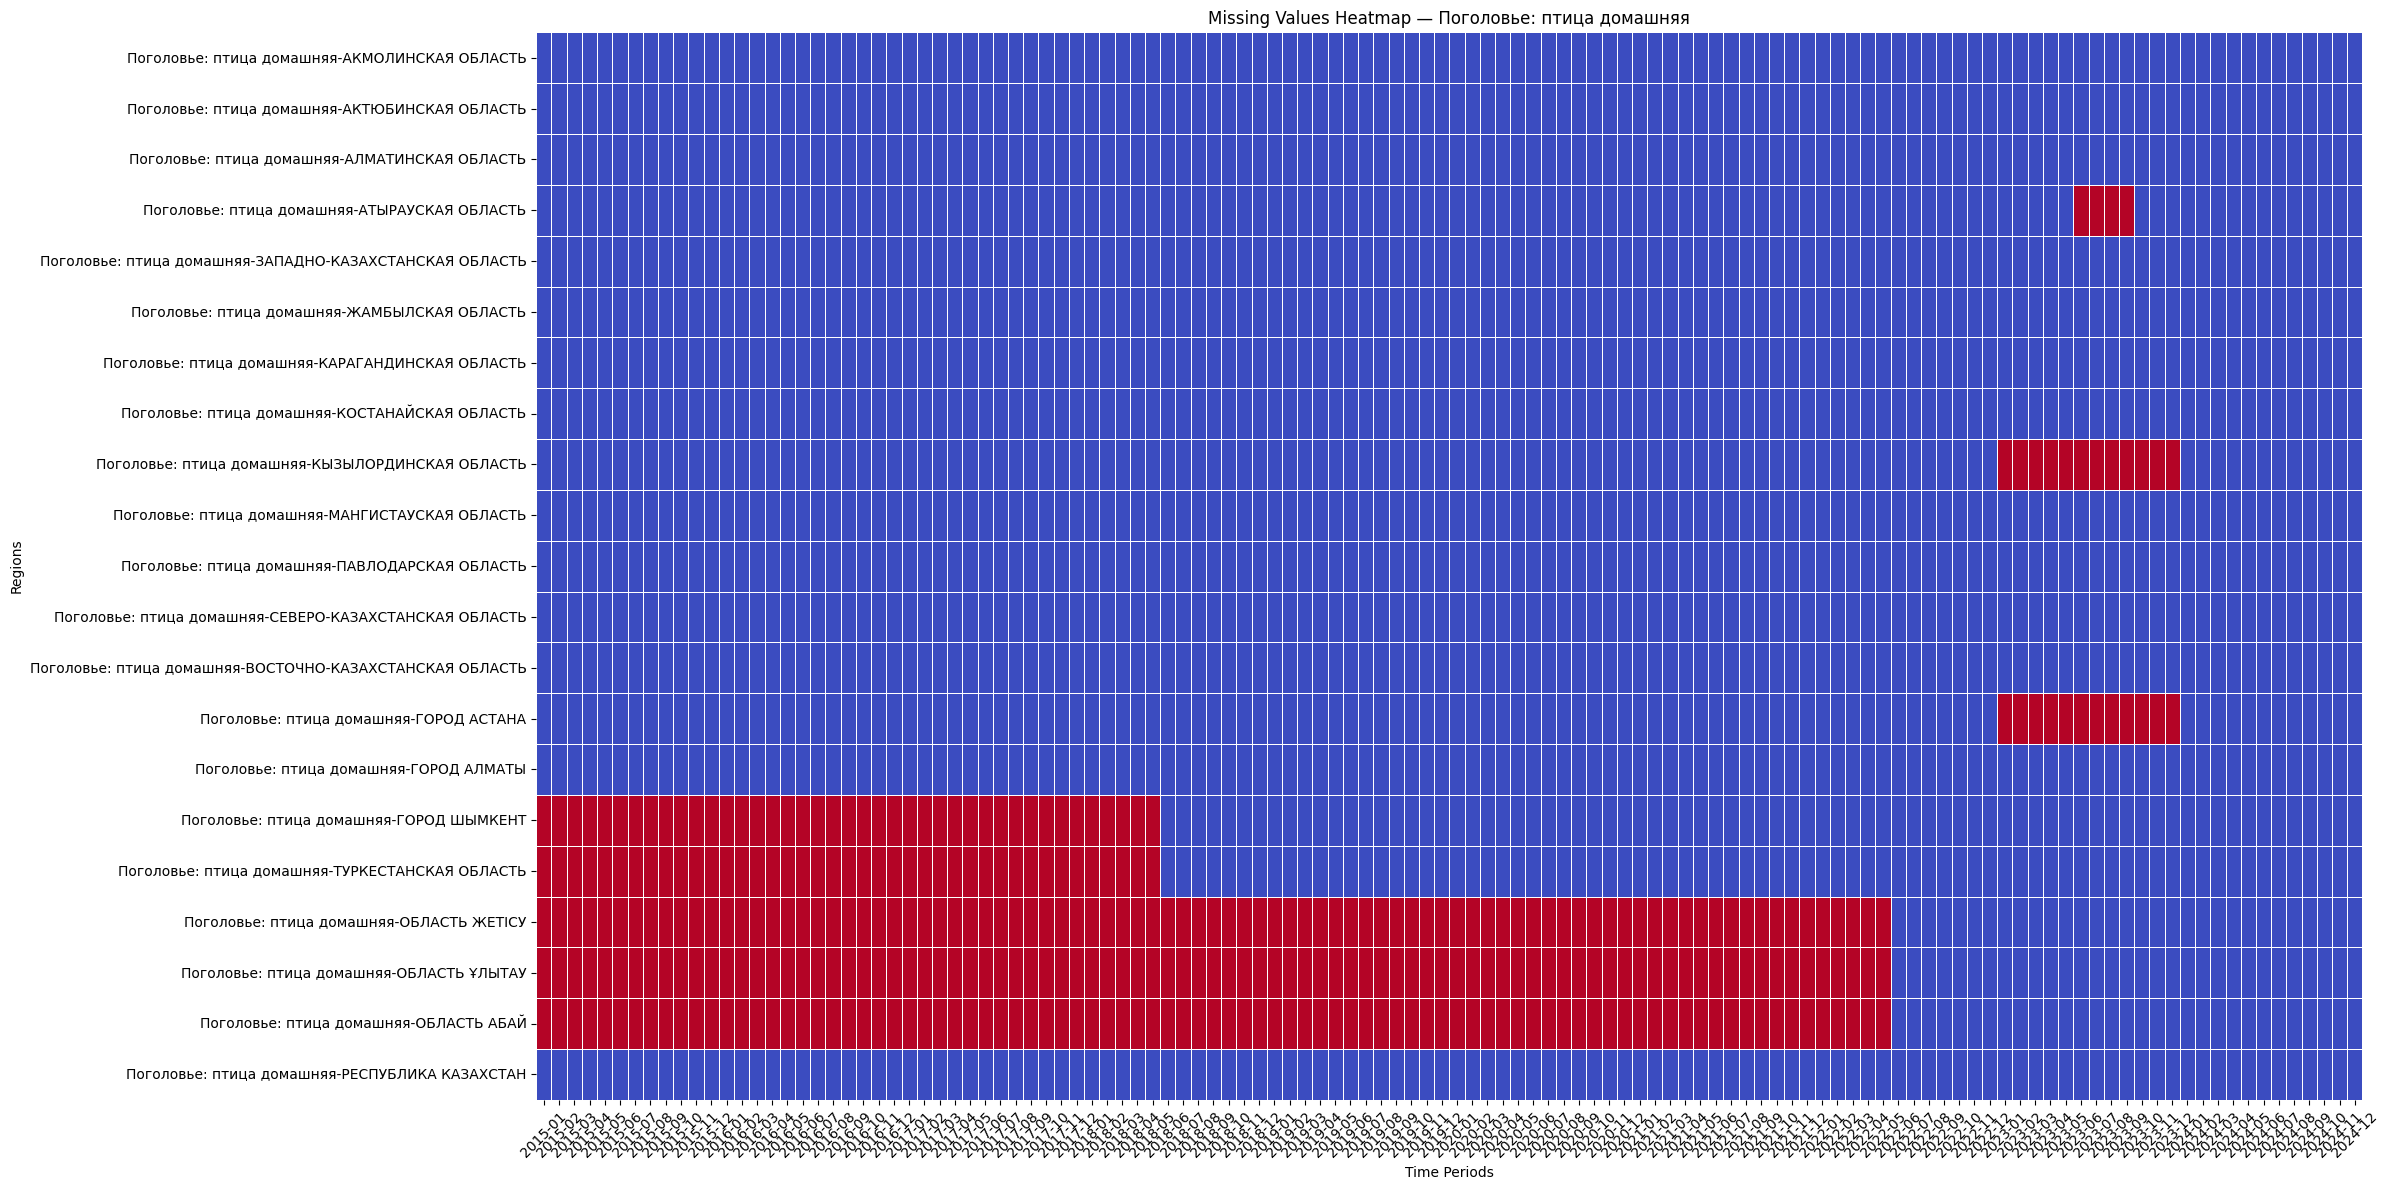

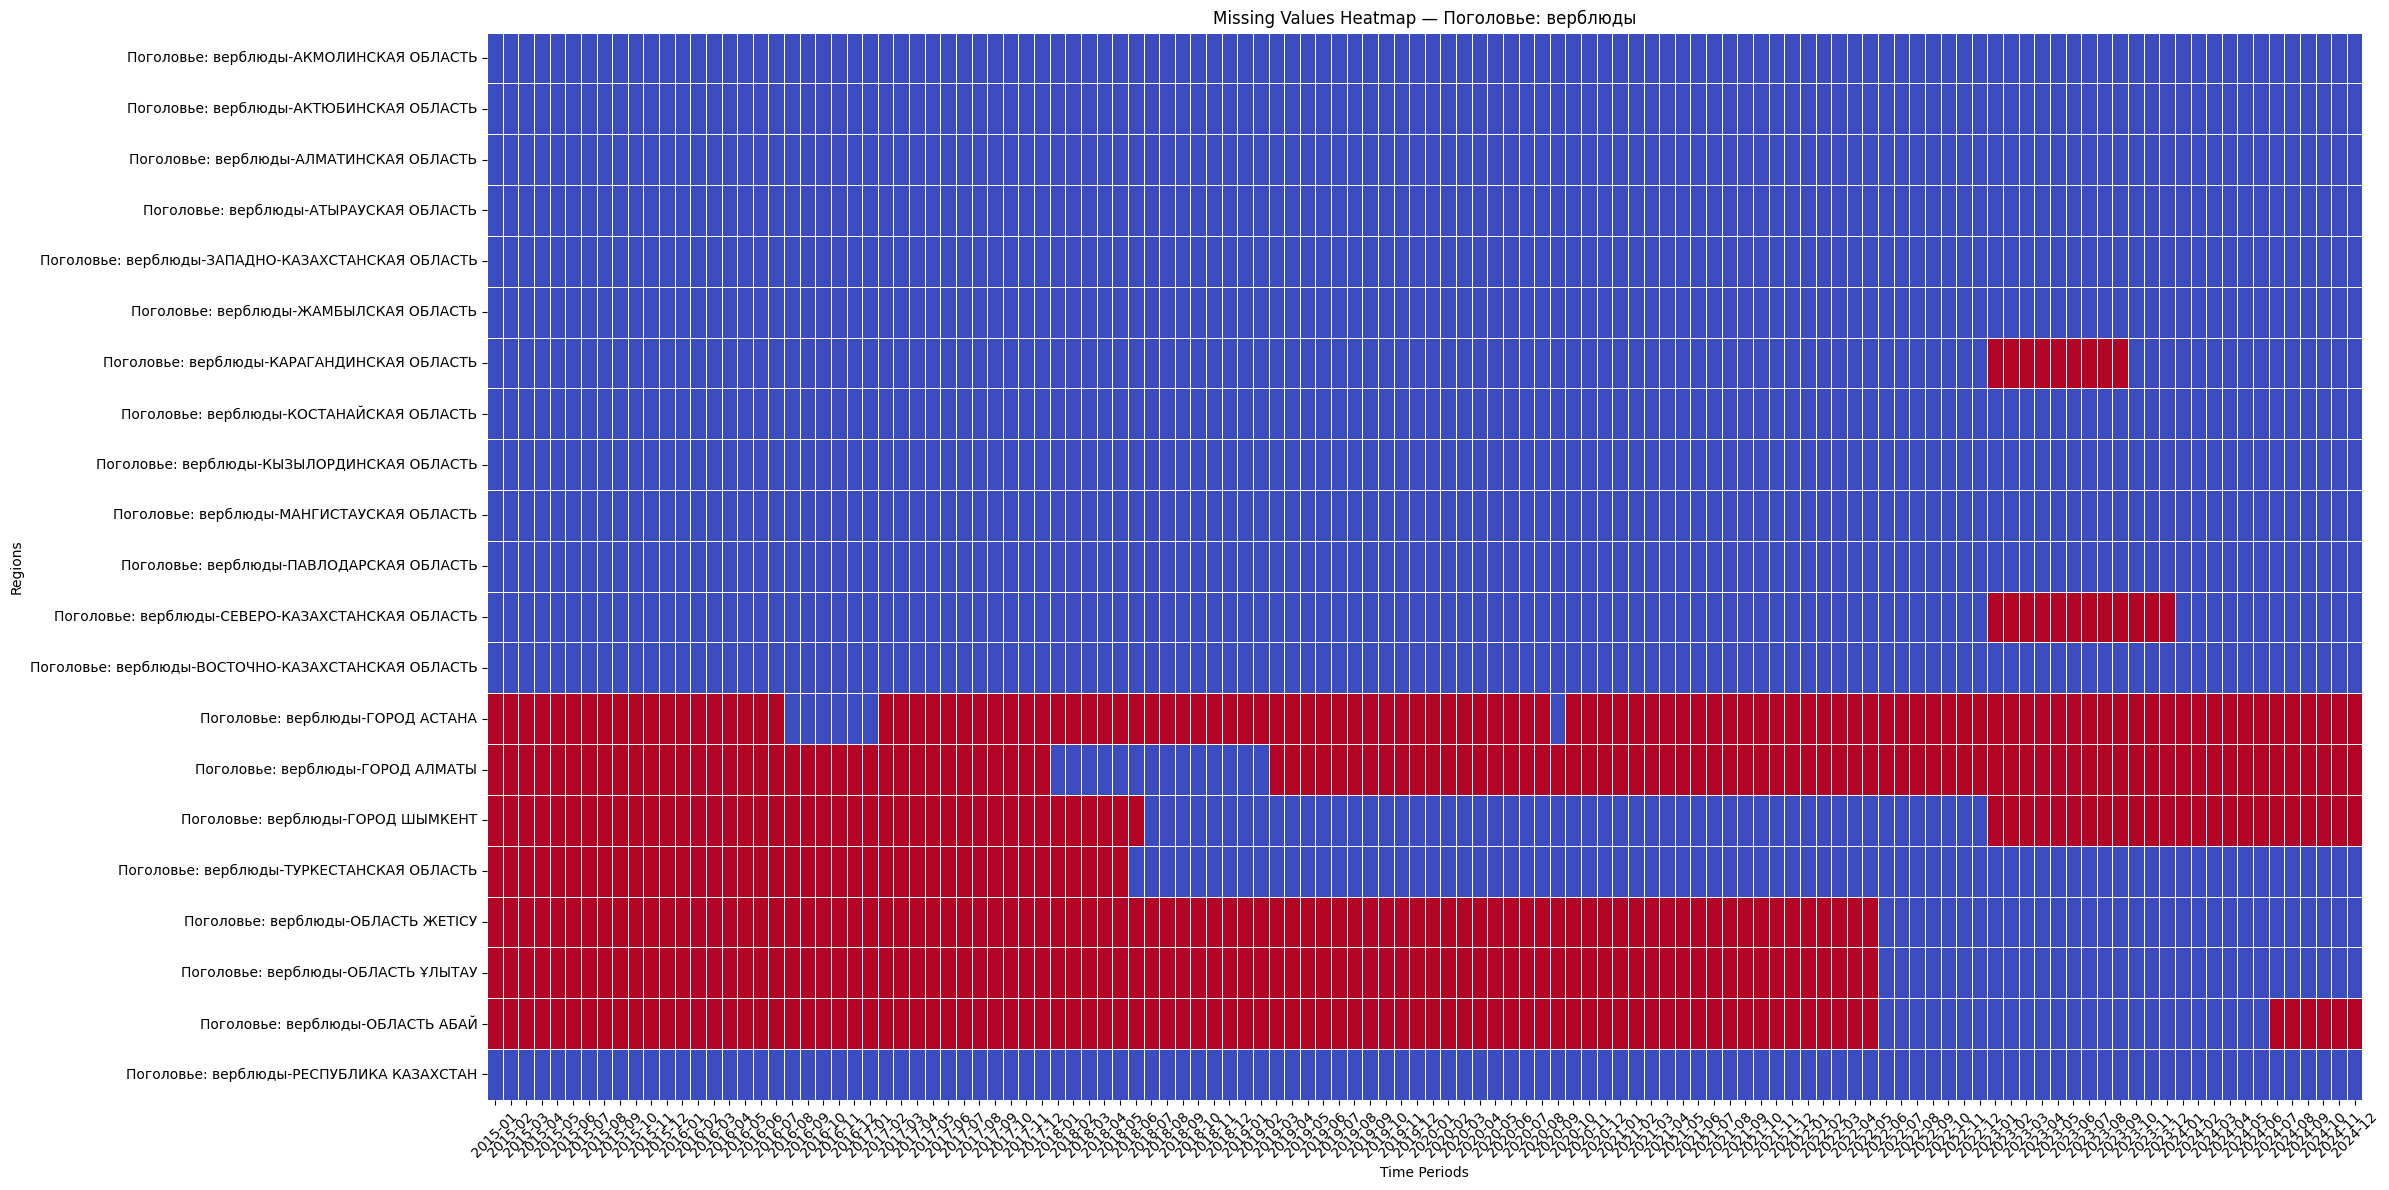

In [9]:
indicators = ['Температура', 'Осадки', 'Поголовье: КРС', 'Поголовье: лошади',
       'Поголовье: овцы и козы', 'Поголовье: свиньи',
       'Поголовье: птица домашняя', 'Поголовье: верблюды']

for indicator in indicators:
    # Filter and convert to numeric
    df_indicator = x_vars[x_vars["Показатель"] == indicator].set_index(["Показатель", "Регион"])
    df_indicator_numeric = df_indicator.apply(pd.to_numeric, errors="coerce")
    
    # Missing heatmap mask
    missing_heatmap = df_indicator_numeric.isna()
    
    # Plot heatmap
    plt.figure(figsize=(24, 12))
    sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
    plt.title(f"Missing Values Heatmap — {indicator}")
    plt.xlabel("Time Periods")
    plt.ylabel("Regions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [10]:
# Step 1: Filter only Осадки data
df_osadki = x_vars[x_vars["Показатель"] == "Осадки"].set_index("Регион")

# Step 2: Loop through each missing cell (excluding those already known)
for region in df_osadki.index:
    for col in df_osadki.columns[1:]:  # skip identifier columns if needed
        val = df_osadki.loc[region, col]
        
        # If it's missing and not part of excluded periods
        if pd.isna(val):
            # Extract month string (e.g. "01" from "2015-01")
            month = col[-2:]
            
            # Get all columns that match that month but not the same year
            month_cols = [c for c in df_osadki.columns[2:] if c.endswith(f"-{month}") and c != col]
            
            # Calculate mean for that region over other years with same month
            month_values = df_osadki.loc[region, month_cols].dropna()
            if not month_values.empty:
                df_osadki.loc[region, col] = month_values.mean()
df_osadki


,Показатель,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Регион,,,,,,,,,,,,,,,,,,,,,
АКМОЛИНСКАЯ ОБЛАСТЬ,Осадки,9.8,9.8,8.3,8.8,42.8,16.7,39.6,23.5,14.5,...,11.4,21.8,51.9,61.9,51.8,49.0,15.000000,15.6,23.7,16.4
АКТЮБИНСКАЯ ОБЛАСТЬ,Осадки,33.6,8.2,15.4,26.1,31.5,2.7,7.3,5.9,4.0,...,20.8,31.2,15.9,46.5,42.0,104.1,0.400000,19.1,33.2,18.5
АЛМАТИНСКАЯ ОБЛАСТЬ,Осадки,8.9,21.3,48.6,61.5,36.0,63.2,4.4,21.6,10.8,...,75.7,73.4,90.7,14.2,69.7,6.8,32.700000,60.4,36.2,30.3
АТЫРАУСКАЯ ОБЛАСТЬ,Осадки,7.7,12.1,18.0,14.0,93.0,0.0,27.1,3.4,12.3,...,27.2,10.0,32.8,20.7,7.8,3.7,2.200000,16.2,32.3,14.2
ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,Осадки,23.7,7.4,3.1,35.8,25.4,28.0,23.7,9.5,32.4,...,31.4,14.2,10.6,46.3,41.1,29.2,25.844444,31.1,32.8,22.2
ЖАМБЫЛСКАЯ ОБЛАСТЬ,Осадки,48.5,25.3,36.2,25.4,16.4,17.8,0.0,39.8,18.4,...,34.0,68.3,22.6,2.6,21.6,0.3,13.000000,48.1,57.6,15.2
КАРАГАНДИНСКАЯ ОБЛАСТЬ,Осадки,43.1,20.5,44.7,45.3,82.7,31.9,46.0,17.4,27.8,...,25.2,25.8,80.9,48.2,124.1,30.1,13.600000,46.2,36.5,27.7
КОСТАНАЙСКАЯ ОБЛАСТЬ,Осадки,22.8,3.4,14.9,20.1,82.3,37.6,47.9,23.0,37.9,...,14.1,31.4,30.2,51.8,56.0,71.3,10.500000,8.9,37.0,6.5
КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,Осадки,16.4,5.9,20.2,22.7,37.9,6.0,0.9,0.8,1.2,...,54.1,3.0,42.9,2.4,5.7,3.2,0.700000,13.2,17.0,13.0


In [11]:
# 1. Reset index to match structure of x_vars
df_osadki_reset = df_osadki.reset_index()

# 2. Drop original Осадки rows from x_vars
x_vars = x_vars[x_vars["Показатель"] != "Осадки"]

# 3. Append the updated Осадки data back in
x_vars = pd.concat([x_vars, df_osadki_reset], ignore_index=True)


In [12]:
# Step 1: Filter only Поголовье: КРС data
df_pogol_krs = x_vars[x_vars["Показатель"] == "Поголовье: КРС"].set_index("Регион")

# Step 2: Loop through each missing cell (excluding those already known)
for region in df_pogol_krs.index:
    for col in df_pogol_krs.columns[1:]:  # skip identifier columns if needed
        val = df_pogol_krs.loc[region, col]
        
        # If it's missing and not part of excluded periods
        if pd.isna(val):
            # Extract month string (e.g. "01" from "2015-01")
            month = col[-2:]
            
            # Get all columns that match that month but not the same year
            month_cols = [c for c in df_pogol_krs.columns[2:] if c.endswith(f"-{month}") and c != col]
            
            # Calculate mean for that region over other years with same month
            month_values = df_pogol_krs.loc[region, month_cols].dropna()
            if not month_values.empty:
                df_pogol_krs.loc[region, col] = month_values.mean()
df_pogol_krs


,Показатель,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Регион,,,,,,,,,,,,,,,,,,,,,
АКМОЛИНСКАЯ ОБЛАСТЬ,Поголовье: КРС,3.725600e+05,3.994420e+05,4.256050e+05,4.400230e+05,4.446470e+05,4.402380e+05,4.261340e+05,4.202440e+05,4.123010e+05,...,404506.0,428509.0,441647.0,444063.0,408936.0,403674.0,398450.0,392916.0,387565.0,379385.0
АКТЮБИНСКАЯ ОБЛАСТЬ,Поголовье: КРС,3.652820e+05,3.805420e+05,4.003740e+05,4.286300e+05,4.487760e+05,4.447090e+05,4.430790e+05,4.315870e+05,4.187420e+05,...,499608.0,516342.0,541803.0,563109.0,558707.0,618446.0,608248.0,593997.0,586597.0,572900.0
АЛМАТИНСКАЯ ОБЛАСТЬ,Поголовье: КРС,9.081300e+05,9.342750e+05,1.001685e+06,1.111130e+06,1.152347e+06,1.144596e+06,1.073302e+06,1.061172e+06,1.041994e+06,...,501081.0,529539.0,554657.0,552352.0,523891.0,650006.0,639294.0,609469.0,588514.0,573276.0
АТЫРАУСКАЯ ОБЛАСТЬ,Поголовье: КРС,1.487830e+05,1.471650e+05,1.514220e+05,1.563820e+05,1.621420e+05,1.715010e+05,1.687530e+05,1.655360e+05,1.627840e+05,...,142013.0,151363.0,157339.0,162413.0,233578.0,230894.0,228702.0,225735.0,223888.0,220670.0
ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,Поголовье: КРС,4.566500e+05,4.654880e+05,4.949540e+05,5.368990e+05,5.517880e+05,5.337760e+05,5.255950e+05,5.179370e+05,5.060170e+05,...,856535.0,883990.0,914197.0,954922.0,996089.0,966428.0,953438.0,941479.0,932197.0,919528.0
ЖАМБЫЛСКАЯ ОБЛАСТЬ,Поголовье: КРС,3.036430e+05,3.167780e+05,3.447170e+05,3.579040e+05,3.566410e+05,3.511200e+05,3.460030e+05,3.370360e+05,3.391980e+05,...,424527.0,441599.0,454158.0,455255.0,489551.0,523425.0,507738.0,495712.0,486310.0,471712.0
КАРАГАНДИНСКАЯ ОБЛАСТЬ,Поголовье: КРС,4.549820e+05,4.974410e+05,5.489900e+05,6.001870e+05,6.468250e+05,6.334540e+05,5.273880e+05,5.122450e+05,4.879110e+05,...,395971.0,435919.0,475838.0,505938.0,497578.0,450231.0,464148.0,445357.0,436981.0,423837.0
КОСТАНАЙСКАЯ ОБЛАСТЬ,Поголовье: КРС,4.068560e+05,4.235990e+05,4.288610e+05,4.302560e+05,4.704070e+05,4.704840e+05,4.552040e+05,4.451290e+05,4.293180e+05,...,388204.0,392610.0,396547.0,416177.0,413990.0,417750.0,408429.0,397079.0,393719.0,392369.0
КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,Поголовье: КРС,2.512430e+05,2.603830e+05,2.664920e+05,2.743440e+05,2.812770e+05,2.805000e+05,2.696170e+05,2.667480e+05,2.637850e+05,...,303122.0,315469.0,325828.0,331067.0,348713.0,423431.0,419888.0,420135.0,414770.0,408643.0


In [13]:
# 1. Reset index to match structure of x_vars
df_pogol_krs_reset = df_pogol_krs.reset_index()

# 2. Drop original Осадки rows from x_vars
x_vars = x_vars[x_vars["Показатель"] != "Поголовье: КРС"]

# 3. Append the updated Осадки data back in
x_vars = pd.concat([x_vars, df_pogol_krs_reset], ignore_index=True)


In [14]:
# Step 1: Filter only Поголовье: Лошади data
df_pogol_loshadi = x_vars[x_vars["Показатель"] == "Поголовье: лошади"].set_index("Регион")

# Step 2: Loop through each missing cell (excluding those already known)
for region in df_pogol_loshadi.index:
    for col in df_pogol_loshadi.columns[1:]:  # skip identifier columns if needed
        val = df_pogol_loshadi.loc[region, col]
        
        # If it's missing and not part of excluded periods
        if pd.isna(val):
            # Extract month string (e.g. "01" from "2015-01")
            month = col[-2:]
            
            # Get all columns that match that month but not the same year
            month_cols = [c for c in df_pogol_loshadi.columns[2:] if c.endswith(f"-{month}") and c != col]
            
            # Calculate mean for that region over other years with same month
            month_values = df_pogol_loshadi.loc[region, month_cols].dropna()
            if not month_values.empty:
                df_pogol_loshadi.loc[region, col] = month_values.mean()
df_pogol_loshadi


,Показатель,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Регион,,,,,,,,,,,,,,,,,,,,,
АКМОЛИНСКАЯ ОБЛАСТЬ,Поголовье: лошади,1.292820e+05,1.390790e+05,1.425450e+05,1.541100e+05,1.666800e+05,1.672190e+05,1.629550e+05,1.606310e+05,1.570700e+05,...,240793.0,244003.0,256992.0,270882.0,267993.0,265823.0,261834.0,258182.0,255413.0,248352.0
АКТЮБИНСКАЯ ОБЛАСТЬ,Поголовье: лошади,7.733500e+04,8.354200e+04,8.585700e+04,9.333200e+04,1.021030e+05,1.017270e+05,1.021400e+05,1.007710e+05,9.810700e+04,...,279858.0,285041.0,304628.0,317636.0,317439.0,329097.0,328082.0,322961.0,320196.0,311244.0
АЛМАТИНСКАЯ ОБЛАСТЬ,Поголовье: лошади,2.602030e+05,2.606420e+05,2.800540e+05,3.106240e+05,3.264210e+05,3.221810e+05,3.121340e+05,3.042370e+05,2.986460e+05,...,166406.0,170736.0,180736.0,185810.0,181728.0,236634.0,233994.0,228716.0,224652.0,217822.0
АТЫРАУСКАЯ ОБЛАСТЬ,Поголовье: лошади,5.341400e+04,5.117200e+04,5.294900e+04,5.832600e+04,6.089200e+04,6.376900e+04,6.272900e+04,6.184300e+04,6.048500e+04,...,104124.0,104974.0,108660.0,111750.0,137556.0,136285.0,136935.0,135529.0,135028.0,135210.0
ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,Поголовье: лошади,1.157870e+05,1.142670e+05,1.159730e+05,1.271330e+05,1.346640e+05,1.393980e+05,1.384430e+05,1.377390e+05,1.364060e+05,...,265319.0,271474.0,291186.0,312490.0,332173.0,300707.0,298164.0,295485.0,293502.0,289991.0
ЖАМБЫЛСКАЯ ОБЛАСТЬ,Поголовье: лошади,9.934500e+04,9.580500e+04,1.015870e+05,1.098910e+05,1.130160e+05,1.142780e+05,1.120470e+05,1.078300e+05,1.040460e+05,...,163734.0,167988.0,173057.0,174697.0,177217.0,184903.0,179662.0,173334.0,169621.0,165604.0
КАРАГАНДИНСКАЯ ОБЛАСТЬ,Поголовье: лошади,2.174840e+05,2.209900e+05,2.431000e+05,2.825030e+05,2.985590e+05,2.921460e+05,2.630680e+05,2.588930e+05,2.533730e+05,...,322116.0,346186.0,401985.0,427174.0,420268.0,378820.0,372567.0,365141.0,362106.0,357475.0
КОСТАНАЙСКАЯ ОБЛАСТЬ,Поголовье: лошади,8.945700e+04,9.407000e+04,9.366000e+04,9.458400e+04,9.777200e+04,1.027880e+05,1.049030e+05,1.032670e+05,1.015170e+05,...,163690.0,163309.0,165553.0,171854.0,164068.0,163339.0,162886.0,162451.0,161078.0,160267.0
КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,Поголовье: лошади,8.078200e+04,8.567700e+04,8.909800e+04,9.355200e+04,9.683900e+04,9.635100e+04,9.754600e+04,9.655400e+04,9.518400e+04,...,246871.0,253375.0,259741.0,268516.0,263350.0,246710.0,253895.0,253380.0,251579.0,249028.0


In [15]:
# 1. Reset index to match structure of x_vars
df_pogol_loshadi_reset = df_pogol_loshadi.reset_index()

# 2. Drop original Осадки rows from x_vars
x_vars = x_vars[x_vars["Показатель"] != "Поголовье: лошади"]

# 3. Append the updated Осадки data back in
x_vars = pd.concat([x_vars, df_pogol_loshadi_reset], ignore_index=True)


In [16]:
# Step 1: Filter only Поголовье: Лошади data
df_pogol_svinii = x_vars[x_vars["Показатель"] == "Поголовье: свиньи"].set_index("Регион")

# Step 2: Loop through each missing cell (excluding those already known)
for region in df_pogol_svinii.index:
    for col in df_pogol_svinii.columns[1:]:  # skip identifier columns if needed
        val = df_pogol_svinii.loc[region, col]
        
        # If it's missing and not part of excluded periods
        if pd.isna(val):
            # Extract month string (e.g. "01" from "2015-01")
            month = col[-2:]
            
            # Get all columns that match that month but not the same year
            month_cols = [c for c in df_pogol_svinii.columns[2:] if c.endswith(f"-{month}") and c != col]
            
            # Calculate mean for that region over other years with same month
            month_values = df_pogol_svinii.loc[region, month_cols].dropna()
            if not month_values.empty:
                df_pogol_svinii.loc[region, col] = month_values.mean()
df_pogol_svinii


,Показатель,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Регион,,,,,,,,,,,,,,,,,,,,,
АКМОЛИНСКАЯ ОБЛАСТЬ,Поголовье: свиньи,110558.0,122818.0,135003.0,142445.0,150158.0,144005.000000,1.241960e+05,1.229100e+05,1.204020e+05,...,54161.000,57840.00,61455.0,65102.000,45241.0,42902.000,39730.00,36628.000,34889.00,32415.0
АКТЮБИНСКАЯ ОБЛАСТЬ,Поголовье: свиньи,30188.0,32780.0,32281.0,32537.0,34025.0,36594.000000,3.773800e+04,3.921000e+04,3.905700e+04,...,7477.000,5236.00,4586.0,4838.000,5557.0,3707.000,3669.00,3234.000,2661.00,2430.0
АЛМАТИНСКАЯ ОБЛАСТЬ,Поголовье: свиньи,97164.0,116283.0,121312.0,111380.0,114181.0,98661.000000,1.117350e+05,1.081270e+05,9.856100e+04,...,18868.000,18339.00,17433.0,27177.000,24948.0,32412.000,30205.00,26999.000,24482.00,23053.0
АТЫРАУСКАЯ ОБЛАСТЬ,Поголовье: свиньи,1002.0,973.0,936.0,819.0,692.0,556.000000,3.300000e+02,3.300000e+02,3.550000e+02,...,124.000,136.00,136.0,125.000,124.0,124.000,124.00,224.000,124.00,223.0
ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,Поголовье: свиньи,25365.0,24966.0,25481.0,26446.0,27384.0,26887.000000,2.672200e+04,2.795700e+04,2.761000e+04,...,13263.000,14587.00,15672.0,16248.000,16076.0,12522.000,12110.00,11599.000,11209.00,10902.0
ЖАМБЫЛСКАЯ ОБЛАСТЬ,Поголовье: свиньи,25902.0,31809.0,33626.0,37178.0,38150.0,36501.000000,3.585200e+04,3.360000e+04,3.272100e+04,...,3732.000,4178.00,4461.0,4706.000,3913.0,4930.000,4822.00,4470.000,4241.00,3861.0
КАРАГАНДИНСКАЯ ОБЛАСТЬ,Поголовье: свиньи,91111.0,93879.0,96771.0,95463.0,92958.0,93075.000000,9.117200e+04,9.005200e+04,8.951300e+04,...,69957.000,71619.00,69884.0,69740.000,70273.0,70210.000,69228.00,70661.000,72638.00,78488.0
КОСТАНАЙСКАЯ ОБЛАСТЬ,Поголовье: свиньи,164021.0,151109.0,160653.0,172126.0,186847.0,194843.000000,2.441760e+05,2.315860e+05,2.247050e+05,...,65091.000,69934.00,75175.0,81256.000,67368.0,69541.000,69197.00,69603.000,69005.00,67217.0
КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,Поголовье: свиньи,2235.0,2390.0,2757.0,2923.0,3145.0,3188.000000,2.575000e+03,2.527000e+03,2.607000e+03,...,593.000,809.00,874.0,770.000,646.0,640.000,601.00,596.000,463.00,410.0


In [17]:
# 1. Reset index to match structure of x_vars
df_pogol_svinii_reset = df_pogol_svinii.reset_index()

# 2. Drop original Осадки rows from x_vars
x_vars = x_vars[x_vars["Показатель"] != "Поголовье: свиньи"]

# 3. Append the updated Осадки data back in
x_vars = pd.concat([x_vars, df_pogol_svinii_reset], ignore_index=True)


In [18]:
# Step 1: Filter only Поголовье: Лошади data
df_pogol_ptica = x_vars[x_vars["Показатель"] == "Поголовье: птица домашняя"].set_index("Регион")

# Step 2: Loop through each missing cell (excluding those already known)
for region in df_pogol_ptica.index:
    for col in df_pogol_ptica.columns[1:]:  # skip identifier columns if needed
        val = df_pogol_ptica.loc[region, col]
        
        # If it's missing and not part of excluded periods
        if pd.isna(val):
            # Extract month string (e.g. "01" from "2015-01")
            month = col[-2:]
            
            # Get all columns that match that month but not the same year
            month_cols = [c for c in df_pogol_ptica.columns[2:] if c.endswith(f"-{month}") and c != col]
            
            # Calculate mean for that region over other years with same month
            month_values = df_pogol_ptica.loc[region, month_cols].dropna()
            if not month_values.empty:
                df_pogol_ptica.loc[region, col] = month_values.mean()
df_pogol_ptica


,Показатель,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Регион,,,,,,,,,,,,,,,,,,,,,
АКМОЛИНСКАЯ ОБЛАСТЬ,Поголовье: птица домашняя,4.436655e+06,4.446764e+06,4.461524e+06,4.575245e+06,4.778690e+06,4.830733e+06,5.133062e+06,5.208563e+06,5.283894e+06,...,8963506.0,9236538.0,9396776.0,9431792.0,9375655.0,9092081.0,9507343.0,9680147.0,8922229.0,8815224.0
АКТЮБИНСКАЯ ОБЛАСТЬ,Поголовье: птица домашняя,1.128132e+06,1.008226e+06,1.121476e+06,1.044075e+06,1.071308e+06,1.108083e+06,1.296220e+06,1.236494e+06,1.231645e+06,...,1137547.0,1076583.0,1037072.0,1078144.0,1181210.0,1166219.0,1124332.0,1180408.0,1131792.0,1206253.0
АЛМАТИНСКАЯ ОБЛАСТЬ,Поголовье: птица домашняя,8.870468e+06,8.231645e+06,8.582791e+06,9.070553e+06,1.024206e+07,1.075048e+07,9.702722e+06,8.756995e+06,8.978894e+06,...,9776562.0,9017980.0,9777056.0,10873523.0,10661644.0,9611304.0,9678533.0,9594453.0,10325766.0,9281812.0
АТЫРАУСКАЯ ОБЛАСТЬ,Поголовье: птица домашняя,1.550100e+05,1.421060e+05,1.332140e+05,1.229090e+05,2.305450e+05,2.593510e+05,2.465160e+05,2.996070e+05,3.450850e+05,...,78924.0,79355.0,23783.0,136589.0,139532.0,139328.0,197107.0,196220.0,195971.0,194540.0
ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,Поголовье: птица домашняя,9.338190e+05,8.536720e+05,8.373380e+05,8.754440e+05,8.972780e+05,1.001078e+06,9.623800e+05,9.094830e+05,8.834000e+05,...,1209809.0,1378836.0,1278652.0,1273236.0,1305273.0,1143580.0,1117624.0,1340125.0,1338377.0,1197774.0
ЖАМБЫЛСКАЯ ОБЛАСТЬ,Поголовье: птица домашняя,1.090817e+06,1.064009e+06,1.058752e+06,1.099098e+06,1.170091e+06,1.176863e+06,1.140381e+06,1.127446e+06,1.081374e+06,...,2023626.0,2227639.0,2058151.0,2210507.0,2074454.0,1946648.0,1829054.0,1803775.0,1842863.0,1840280.0
КАРАГАНДИНСКАЯ ОБЛАСТЬ,Поголовье: птица домашняя,3.533940e+06,3.521489e+06,3.595966e+06,3.592207e+06,3.804757e+06,3.946976e+06,3.428915e+06,3.531930e+06,3.533596e+06,...,3360836.0,3299026.0,3318777.0,3323287.0,3351518.0,3426674.0,3601458.0,3476004.0,3452961.0,3453132.0
КОСТАНАЙСКАЯ ОБЛАСТЬ,Поголовье: птица домашняя,4.339047e+06,4.252332e+06,4.355080e+06,4.403034e+06,4.258368e+06,4.218033e+06,4.711784e+06,4.864764e+06,4.845163e+06,...,3013031.0,2978347.0,2929987.0,2629666.0,2589533.0,2880509.0,2831284.0,2877183.0,3053867.0,2951288.0
КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,Поголовье: птица домашняя,8.334200e+04,8.968500e+04,8.934000e+04,8.857200e+04,8.771000e+04,8.925900e+04,9.072200e+04,9.859400e+04,9.808400e+04,...,126877.0,123077.0,126005.0,127612.0,127916.0,125396.0,130405.0,120395.0,119537.0,122142.0


In [19]:
# 1. Reset index to match structure of x_vars
df_pogol_ptica_reset = df_pogol_ptica.reset_index()

# 2. Drop original Осадки rows from x_vars
x_vars = x_vars[x_vars["Показатель"] != "Поголовье: птица домашняя"]

# 3. Append the updated Осадки data back in
x_vars = pd.concat([x_vars, df_pogol_ptica_reset], ignore_index=True)


In [20]:
# Step 1: Filter only Поголовье: Лошади data
df_pogol_verblyudy = x_vars[x_vars["Показатель"] == "Поголовье: верблюды"].set_index("Регион")

# Step 2: Loop through each missing cell (excluding those already known)
for region in df_pogol_verblyudy.index:
    for col in df_pogol_verblyudy.columns[1:]:  # skip identifier columns if needed
        val = df_pogol_verblyudy.loc[region, col]
        
        # If it's missing and not part of excluded periods
        if pd.isna(val):
            # Extract month string (e.g. "01" from "2015-01")
            month = col[-2:]
            
            # Get all columns that match that month but not the same year
            month_cols = [c for c in df_pogol_verblyudy.columns[2:] if c.endswith(f"-{month}") and c != col]
            
            # Calculate mean for that region over other years with same month
            month_values = df_pogol_verblyudy.loc[region, month_cols].dropna()
            if not month_values.empty:
                df_pogol_verblyudy.loc[region, col] = month_values.mean()
df_pogol_verblyudy


,Показатель,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Регион,,,,,,,,,,,,,,,,,,,,,
АКМОЛИНСКАЯ ОБЛАСТЬ,Поголовье: верблюды,140.00,111.000000,116.00,120.00,123.000000,125.000000,126.000000,124.000000,115.000000,...,155.00,175.00,187.00,187.00,209.0,210.0,212.0,212.0,212.0,212.0
АКТЮБИНСКАЯ ОБЛАСТЬ,Поголовье: верблюды,14867.00,15265.000000,15031.00,16139.00,16218.000000,16372.000000,16526.000000,16520.000000,16433.000000,...,20000.00,20001.00,21586.00,21717.00,21879.0,23802.0,23813.0,23704.0,23566.0,23224.0
АЛМАТИНСКАЯ ОБЛАСТЬ,Поголовье: верблюды,7960.00,7747.000000,8050.00,8249.00,8150.000000,8356.000000,7666.000000,7447.000000,7403.000000,...,6399.00,6143.00,6551.00,7197.00,7126.0,7663.0,7594.0,7500.0,7461.0,7420.0
АТЫРАУСКАЯ ОБЛАСТЬ,Поголовье: верблюды,28333.00,27543.000000,29376.00,30933.00,31947.000000,31691.000000,31580.000000,31330.000000,31196.000000,...,35818.00,36081.00,37182.00,38472.00,41561.0,42200.0,42405.0,42139.0,41356.0,41121.0
ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,Поголовье: верблюды,2885.00,2867.000000,2972.00,3182.00,3195.000000,2935.000000,2882.000000,2878.000000,2833.000000,...,2585.00,2625.00,2791.00,2940.00,2869.0,2596.0,2583.0,2523.0,2531.0,2526.0
ЖАМБЫЛСКАЯ ОБЛАСТЬ,Поголовье: верблюды,5530.00,5304.000000,5645.00,6015.00,6198.000000,6157.000000,6092.000000,6067.000000,5939.000000,...,6622.00,7317.00,7810.00,7887.00,7866.0,7705.0,7765.0,7507.0,7442.0,7358.0
КАРАГАНДИНСКАЯ ОБЛАСТЬ,Поголовье: верблюды,1207.00,1567.000000,1709.00,1792.00,1861.000000,1866.000000,1496.000000,1495.000000,1472.000000,...,1158.00,1326.00,1369.00,1414.00,1426.0,1432.0,1245.0,1221.0,1221.0,1221.0
КОСТАНАЙСКАЯ ОБЛАСТЬ,Поголовье: верблюды,177.00,171.000000,170.00,170.00,186.000000,184.000000,175.000000,174.000000,169.000000,...,265.00,264.00,267.00,279.00,248.0,248.0,248.0,248.0,248.0,248.0
КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,Поголовье: верблюды,34471.00,34890.000000,36419.00,38467.00,39805.000000,39920.000000,37429.000000,37420.000000,37551.000000,...,59981.00,61574.00,63660.00,66450.00,66068.0,65274.0,65265.0,65425.0,65275.0,64160.0


In [21]:
# 1. Reset index to match structure of x_vars
df_pogol_verblyudy_reset = df_pogol_verblyudy.reset_index()

# 2. Drop original Осадки rows from x_vars
x_vars = x_vars[x_vars["Показатель"] != "Поголовье: птица домашняя"]

# 3. Append the updated Осадки data back in
x_vars = pd.concat([x_vars, df_pogol_verblyudy_reset], ignore_index=True)


In [22]:
# Step 1: Define target regions and periods
regions_to_null = ['ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ', 'ОБЛАСТЬ АБАЙ']  # Replace with actual names
periods_to_null = pd.date_range("2015-01", "2022-05", freq="MS").strftime("%Y-%m")

# Step 2: Replace matching values with NaN
mask = (
    x_vars["Регион"].isin(regions_to_null) &
    x_vars.columns[1:].to_series().isin(periods_to_null).any()
)

# Step 3: Set values to NaN across all columns for those rows and columns
value_columns = x_vars.columns[1:]  # assuming first 3 columns are identifiers

for period in periods_to_null:
    if period in value_columns:
        x_vars.loc[x_vars["Регион"].isin(regions_to_null), period] = np.nan


In [23]:
# Step 1: Define target regions and periods
regions_to_null = ['ГОРОД ШЫМКЕНТ', 'ТУРКЕСТАНСКАЯ ОБЛАСТЬ']  # Replace with actual names
periods_to_null = pd.date_range("2015-01", "2018-05", freq="MS").strftime("%Y-%m")

# Step 2: Replace matching values with NaN
mask = (
    x_vars["Регион"].isin(regions_to_null) &
    x_vars.columns[1:].to_series().isin(periods_to_null).any()
)

# Step 3: Set values to NaN across all columns for those rows and columns
value_columns = x_vars.columns[1:]  # assuming first 3 columns are identifiers

for period in periods_to_null:
    if period in value_columns:
        x_vars.loc[x_vars["Регион"].isin(regions_to_null), period] = np.nan


In [24]:
x_vars

,Показатель,Регион,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,Температура,АКМОЛИНСКАЯ ОБЛАСТЬ,-12.490323,-10.192857,-5.870968,4.490000,14.574194,20.763333,19.180645,16.529032,...,-4.809677,8.026667,10.696774,21.043333,20.270968,17.338710,11.300000,3.832258,-4.343333,-7.638710
1,Температура,АКТЮБИНСКАЯ ОБЛАСТЬ,-13.483871,-11.821429,-5.990323,6.356667,15.609677,25.126667,23.167742,20.732258,...,-4.800000,13.513333,13.083871,22.893333,22.912903,20.206452,14.083333,6.667742,-1.520000,-6.419355
2,Температура,АЛМАТИНСКАЯ ОБЛАСТЬ,-5.432258,-1.100000,2.909677,12.126667,17.180645,20.980000,25.564516,22.100000,...,2.812903,11.100000,16.348387,22.023333,23.158065,23.487097,13.726667,9.222581,2.256667,-6.796774
3,Температура,АТЫРАУСКАЯ ОБЛАСТЬ,-6.222581,-6.300000,0.380645,10.856667,19.506452,28.906667,27.177419,25.241935,...,2.522581,17.776667,17.341935,27.453333,28.264516,25.774194,19.956667,10.648387,3.096667,-2.612903
4,Температура,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,-11.845161,-8.928571,-4.406452,7.470000,17.100000,25.283333,22.690323,20.348387,...,-4.632258,14.926667,13.332258,23.853333,24.132258,21.151613,15.246667,8.261290,0.423333,-5.496774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Поголовье: верблюды,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37962.000000,39714.000000,42343.000000,43098.000000,1889.000000,2309.000000,2298.000000,2293.000000,2293.000000,2264.000000
162,Поголовье: верблюды,ОБЛАСТЬ ЖЕТІСУ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1819.000000,1834.000000,1841.000000,1861.000000,747.000000,685.000000,685.000000,685.000000,685.000000,685.000000
163,Поголовье: верблюды,ОБЛАСТЬ ҰЛЫТАУ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,710.000000,711.000000,711.000000,747.000000,502.000000,510.000000,515.000000,515.000000,513.000000,509.000000
164,Поголовье: верблюды,ОБЛАСТЬ АБАЙ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,476.000000,444.000000,465.000000,495.000000,286.000000,286.000000,286.000000,303.000000,303.000000,296.500000


In [25]:
x_vars.to_excel("output data/доп регрессоры обработанные.xlsx", index=False)